## Part 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from omniplot  import plot as op
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from functions_EDA_SP import scatter_plots_aggregated, calculate_correlation_regression, scatter_plots_aggregated_with_categorical, calculate_correlation_regression_with_categorical, filter_and_extract_values, plot_all_variables_across_groups, find_max_min


Now I am going to do the analysis using the correlation data. To do that, I am going to take from each dataset, the correlation values > 0.15 or < -0.15 and see what values are interesting for our hyphotesis, and, at the same time, checking if any other parameter (gender, health problems, etc) could be interesting.

In [2]:
results_dataframe = pd.read_excel("./data/correlation_age.xlsx")
results_dataframe2 = pd.read_excel("./data/correlation_age_gender.xlsx")
results_dataframe3 = pd.read_excel("./data/correlation_age_group.xlsx")
results_dataframe6 = pd.read_excel("./data/correlation_age_high_blood_pressure.xlsx")
results_dataframe7 = pd.read_excel("./data/correlation_age_diabetes.xlsx")
results_dataframe8 = pd.read_excel("./data/correlation_age_cancer.xlsx")
results_dataframe9 = pd.read_excel("./data/correlation_age_lung_disease.xlsx")
results_dataframe10 = pd.read_excel("./data/correlation_age_heart_condition.xlsx")
results_dataframe11 = pd.read_excel("./data/correlation_age_stroke.xlsx")
results_dataframe12 = pd.read_excel("./data/correlation_age_psych_problems.xlsx")
results_dataframe13 = pd.read_excel("./data/correlation_age_dementia.xlsx")
results_dataframe14 = pd.read_excel("./data/correlation_age_cholesterol.xlsx")


#### Only age:

In [3]:
def highlight_greater_than_015(val):
    try:
        float_val = float(val)
        return 'background-color: green' if float_val > 0.15 else ''
    except (ValueError, TypeError):
        return ''

def highlight_less_than_minus015(val):
    try:
        float_val = float(val)
        return 'background-color: red' if float_val < -0.15 else ''
    except (ValueError, TypeError):
        return ''


In [4]:
results_dataframe.style.applymap(highlight_greater_than_015).applymap(highlight_less_than_minus015)

/var/folders/dr/1qng7vzn0593pjnyktl5znnr0000gn/T/ipykernel_85643/949625361.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  results_dataframe.style.applymap(highlight_greater_than_015).applymap(highlight_less_than_minus015)


In [5]:
age = filter_and_extract_values(results_dataframe, 'Correlation', 0.15, 'Column2')
age

Column2  Correlation
0                                        HHIDPN    -0.652395
1                                          HHID    -0.652395
2                  ALANINE_AMINOTRANSFERASE_U_L    -0.187497
3                       UREA_NITROGEN_BUN_MG_DL     0.229451
4                               CYSTATIN_C_MG_L     0.220699
5   DEHYDROEPIANDROSTERONE_SULFATE_DHEAS_UMOL_L    -0.311143
6                           PERCENT_LYMPHOCYTES    -0.160323
7                    MEAN_CORPUSCULAR_VOLUME_FL     0.156871
8                  RED_BLOOD_CELL_COUNT_10E12_L    -0.192334
9                            PROTEIN_TOTAL_G_DL    -0.155718
10                                     TGF_BETA    -0.177443
11                                         IGF1    -0.167581
12                                  PCD4M_COUNT    -0.211970
13                            CD4_T_Cells_Count    -0.192126
14                      CD8_T_Cells_Naive_Count    -0.337667
15                                T_Cells_Count    -0.199537
16                           T_Cells_Percentage    -0.159336
17                                   CYSTATIN_C     0.231877

#### By age

First I need to separate in Young, Middle and Old datasets

In [7]:
young_df = results_dataframe3[results_dataframe3['Category'] == 'Young']
middle_df = results_dataframe3[results_dataframe3['Category'] == 'Middle']
old_df = results_dataframe3[results_dataframe3['Category'] == 'Old']

In [8]:
young = filter_and_extract_values(young_df, 'Correlation', 0.15, 'Column2')
middle = filter_and_extract_values(middle_df, 'Correlation', 0.15, 'Column2')
old = filter_and_extract_values(old_df, 'Correlation', 0.15, 'Column2')

#### By gender

First I need to separate in Female and Male datasets

In [9]:
male_df = results_dataframe2[results_dataframe2['Category'] == 'Male']
female_df = results_dataframe2[results_dataframe2['Category'] == 'Female']

In [10]:
male = filter_and_extract_values(male_df, 'Correlation', 0.15, 'Column2')
female = filter_and_extract_values(female_df, 'Correlation', 0.15, 'Column2')

#### By health issues

- High_blood_pressure (Y/N)
- Diabetes (Y/N)
- Cancer (Y/N)
- Lung disease (Y/N)
- Heart condition (Y/N)
- Stroke (Y/N)
- Psychiatric problems (Y/N)
- Dementia (Y/N)
- Cholesterol (Y/N)

First I need to separate in the different categories.

Note: Not going to add life satisfaction here for the moment.

In [11]:
pressure_yes_df = results_dataframe6[results_dataframe6['Category'] == 'YES']
pressure_no_df = results_dataframe6[results_dataframe6['Category'] == 'NO']

In [12]:
pressure_yes = filter_and_extract_values(pressure_yes_df, 'Correlation', 0.15, 'Column2')
pressure_no = filter_and_extract_values(pressure_no_df, 'Correlation', 0.15, 'Column2')

In [13]:
diabetes_yes_df = results_dataframe7[results_dataframe7['Category'] == 'YES']
diabetes_no_df = results_dataframe7[results_dataframe7['Category'] == 'NO']

In [14]:
diabetes_yes = filter_and_extract_values(diabetes_yes_df, 'Correlation', 0.15, 'Column2')
diabetes_no = filter_and_extract_values(diabetes_no_df, 'Correlation', 0.15, 'Column2')

In [15]:
cancer_yes_df = results_dataframe8[results_dataframe8['Category'] == 'YES']
cancer_no_df = results_dataframe8[results_dataframe8['Category'] == 'NO']

In [16]:
cancer_yes = filter_and_extract_values(cancer_yes_df, 'Correlation', 0.15, 'Column2')
cancer_no = filter_and_extract_values(cancer_no_df, 'Correlation', 0.15, 'Column2')

In [17]:
lung_disease_yes_df = results_dataframe9[results_dataframe9['Category'] == 'YES']
lung_disease_no_df = results_dataframe9[results_dataframe9['Category'] == 'NO']

In [18]:
lung_disease_yes = filter_and_extract_values(lung_disease_yes_df, 'Correlation', 0.15, 'Column2')
lung_disease_no = filter_and_extract_values(lung_disease_no_df, 'Correlation', 0.15, 'Column2')

In [19]:
heart_condition_yes_df = results_dataframe10[results_dataframe10['Category'] == 'YES']
heart_condition_no_df = results_dataframe10[results_dataframe10['Category'] == 'NO']

In [20]:
heart_condition_yes = filter_and_extract_values(heart_condition_yes_df, 'Correlation', 0.15, 'Column2')
heart_condition_no = filter_and_extract_values(heart_condition_no_df, 'Correlation', 0.15, 'Column2')

In [21]:
stroke_yes_df = results_dataframe11[results_dataframe11['Category'] == 'YES']
stroke_no_df = results_dataframe11[results_dataframe11['Category'] == 'NO']

In [22]:
stroke_yes = filter_and_extract_values(stroke_yes_df, 'Correlation', 0.15, 'Column2')
stroke_no = filter_and_extract_values(stroke_no_df, 'Correlation', 0.15, 'Column2')

In [23]:
psych_probl_yes_df = results_dataframe12[results_dataframe12['Category'] == 'YES']
psych_probl_no_df = results_dataframe12[results_dataframe12['Category'] == 'NO']

In [24]:
psych_probl_yes = filter_and_extract_values(psych_probl_yes_df, 'Correlation', 0.15, 'Column2')
psych_probl_no = filter_and_extract_values(psych_probl_no_df, 'Correlation', 0.15, 'Column2')

In [25]:
dementia_yes_df = results_dataframe13[results_dataframe13['Category'] == 'YES']
dementia_no_df = results_dataframe13[results_dataframe13['Category'] == 'NO']

In [26]:
dementia_yes = filter_and_extract_values(dementia_yes_df, 'Correlation', 0.15, 'Column2')
dementia_no = filter_and_extract_values(dementia_no_df, 'Correlation', 0.15, 'Column2')

In [27]:
cholesterol_yes_df = results_dataframe14[results_dataframe14['Category'] == 'YES']
cholesterol_no_df = results_dataframe14[results_dataframe14['Category'] == 'NO']

In [28]:
cholesterol_yes = filter_and_extract_values(cholesterol_yes_df, 'Correlation', 0.15, 'Column2')
cholesterol_no = filter_and_extract_values(cholesterol_no_df, 'Correlation', 0.15, 'Column2')

Now I am going to join (outer) all the data and analyse the different correlation within each parameter.
I'll exclude young and middle as there are low number of data points.

In [31]:
dfs = [age, old, male, female, pressure_yes, pressure_no, diabetes_yes, diabetes_no, cancer_yes, cancer_no, lung_disease_yes, lung_disease_no,
       heart_condition_yes, heart_condition_no, stroke_yes, stroke_no, psych_probl_yes, psych_probl_no, dementia_yes, dementia_no, cholesterol_yes, cholesterol_no]

suffixes = ['_only_age', '_old_age', '_male', '_female', '_pressure_yes', '_pressure_no', '_diabetes_yes', '_diabetes_no', '_cancer_yes', 
            '_cancer_no','_lung_disease_yes','_lung_disease_no','_heart_condition_yes','_heart_condition_no','_stroke_yes','_stroke_no',
            '_psych_probl_yes','_psych_probl_no', '_dementia_yes', '_dementia_no', '_cholesterol_yes', '_cholesterol_no']

merged_dataframe = dfs[0]

for i in range(1, len(dfs)):
    merged_dataframe = pd.merge(merged_dataframe, dfs[i], on='Column2', how='outer', suffixes=('', suffixes[i]))

merged_dataframe

Column2  Correlation  \
0                                              HHIDPN    -0.652395   
1                                                HHID    -0.652395   
2                        ALANINE_AMINOTRANSFERASE_U_L    -0.187497   
3                             UREA_NITROGEN_BUN_MG_DL     0.229451   
4                                     CYSTATIN_C_MG_L     0.220699   
5         DEHYDROEPIANDROSTERONE_SULFATE_DHEAS_UMOL_L    -0.311143   
6                                 PERCENT_LYMPHOCYTES    -0.160323   
7                          MEAN_CORPUSCULAR_VOLUME_FL     0.156871   
8                        RED_BLOOD_CELL_COUNT_10E12_L    -0.192334   
9                                  PROTEIN_TOTAL_G_DL    -0.155718   
10                                           TGF_BETA    -0.177443   
11                                               IGF1    -0.167581   
12                                        PCD4M_COUNT    -0.211970   
13                                  CD4_T_Cells_Count    -0.192126   
14                            CD8_T_Cells_Naive_Count    -0.337667   
15                                      T_Cells_Count    -0.199537   
16                                 T_Cells_Percentage    -0.159336   
17                                         CYSTATIN_C     0.231877   
18                                       ALBUMIN_G_DL          NaN   
19                             MONOCYTE_COUNT_X10E9_L          NaN   
20                                  PERCENT_MONOCYTES          NaN   
21  B_TYPE_NATRIURETIC_PEPTIDE_N_TERMINAL_PRO_NT_P...          NaN   
22                             BICARBONATE_CO2_MMOL_L          NaN   
23                          CD16_Plus_Monocytes_Count          NaN   
24                                  CD8_T_Cells_Count          NaN   
25                                    Monocytes_Count          NaN   
26                         CD16_Minus_Monocytes_Count          NaN   
27                                         VITAMIN_D3          NaN   
28                           LYMPHOCYTE_COUNT_X10E9_L          NaN   
29                                               BDNF          NaN   
30                                Naive_B_Cells_Count          NaN   
31                                 HEMATOCRIT_PERCENT          NaN   
32                                    HEMOGLOBIN_G_DL          NaN   
33     MEAN_CORPUSCULAR_HEMOGLOBIN_CONCENTRATION_G_DL          NaN   
34                                       HOMOCYSTEINE          NaN   
35                                          CLUSTERIN          NaN   
36                               Monocytes_Percentage          NaN   
37                                                HDL          NaN   
38                                        weight_2016          NaN   
39                              BILIRUBIN_TOTAL_MG_DL          NaN   
40                     MEAN_CORPUSCULAR_HEMOGLOBIN_PG          NaN   
41                                PERCENT_NEUTROPHILS          NaN   
42                              PLATELET_COUNT_10E9_L          NaN   
43                    Natural_Killer_Cells_Percentage          NaN   
44                             BASOPHIL_COUNT_X10E9_L          NaN   
45                                  PERCENT_BASOPHILS          NaN   
46                                PERCENT_EOSINOPHILS          NaN   
47                                   POTASSIUM_MMOL_L          NaN   
48                            MEAN_PLATELET_VOLUME_FL          NaN   
49                RED_CELL_DISTRIBUTION_WIDTH_PERCENT          NaN   
50                                TRIGLYCERIDES_MG_DL          NaN   
51                      WHITE_BLOOD_CELL_COUNT_10E9_L          NaN   
52                                 MT_DNA_COPY_NUMBER          NaN   
53                              NK_Cells_CD56LO_Count          NaN   
54                     CD16_Plus_Monocytes_Percentage          NaN   
55                                    PCD4TEMRA_COUNT          NaN   
56                                                A1C   

In [ ]:
output_file = "./data/merged_correlations.xlsx"
merged_dataframe.to_excel(output_file, index=False)

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


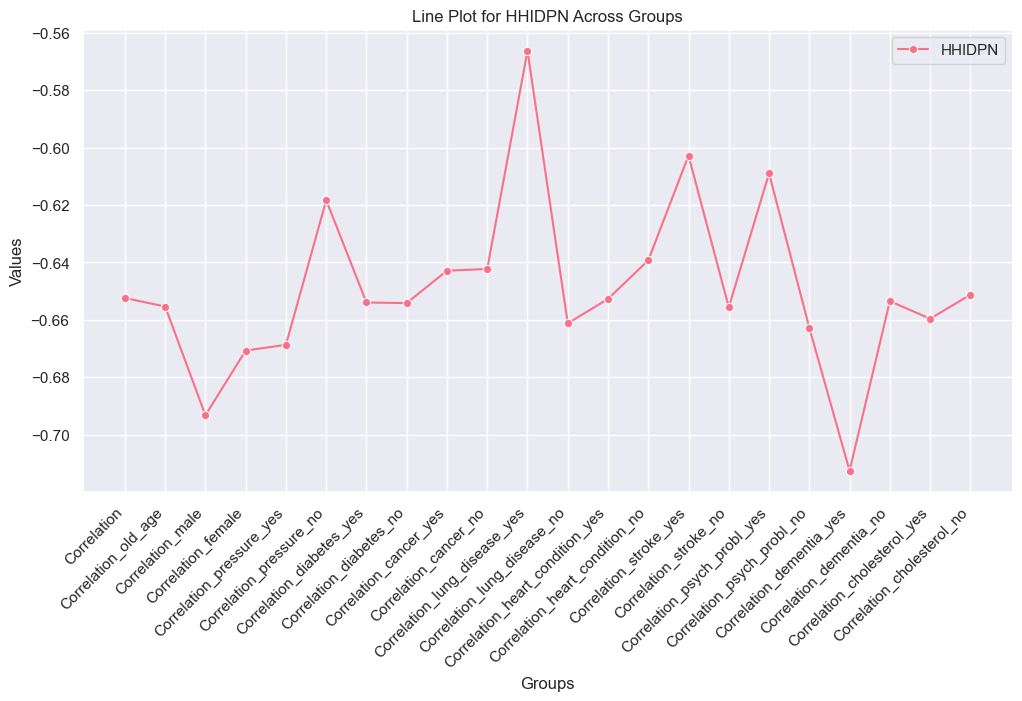

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


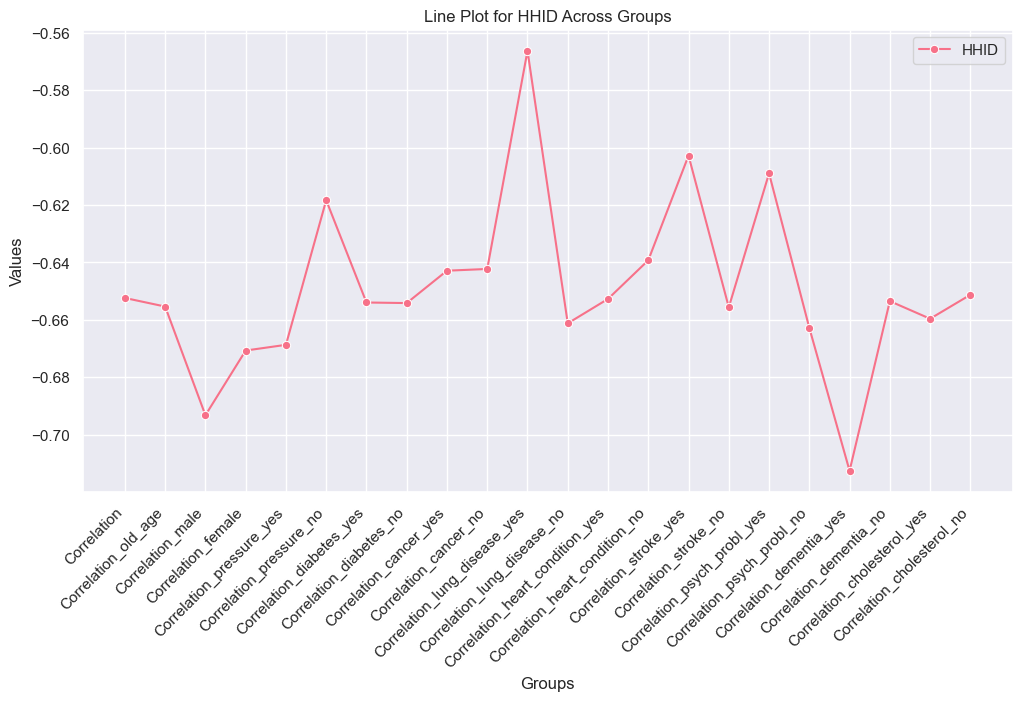

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


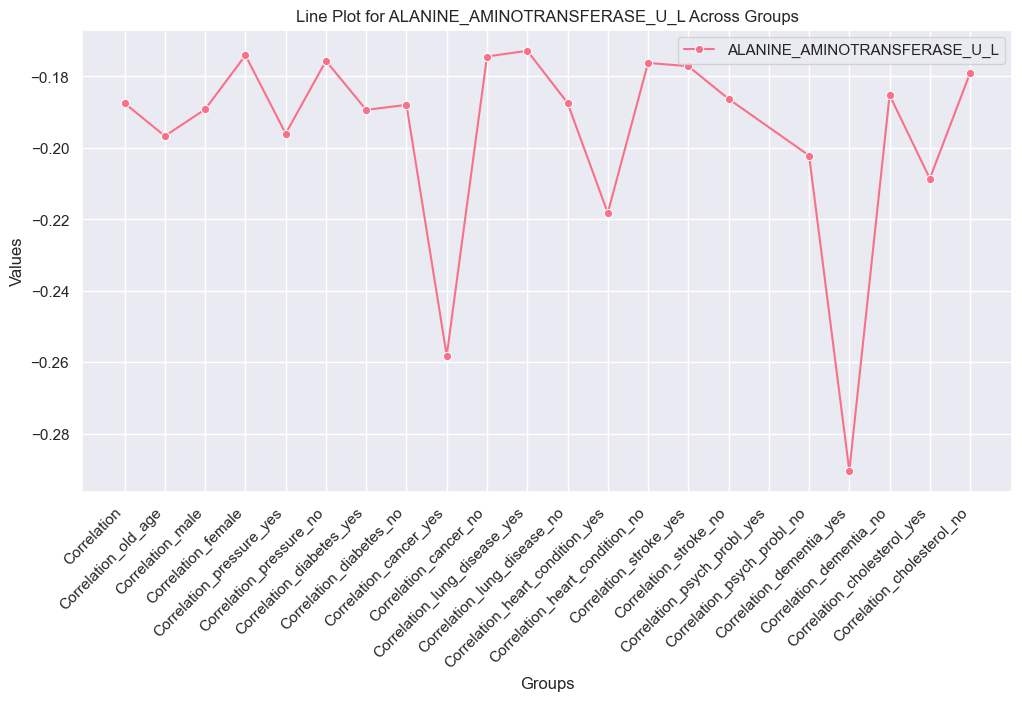

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


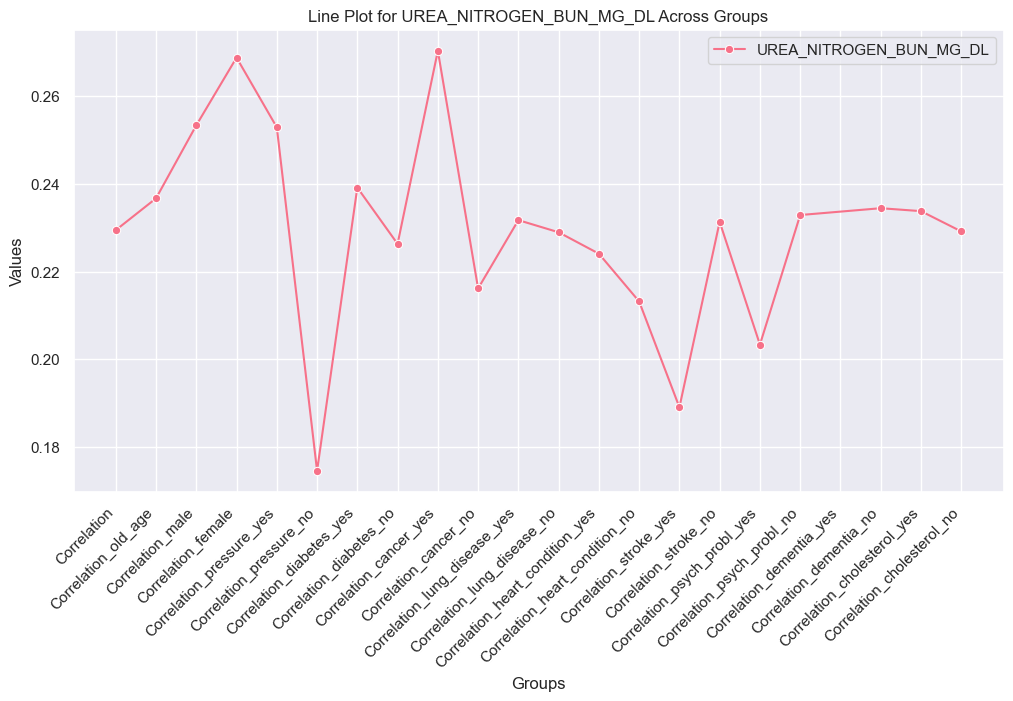

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


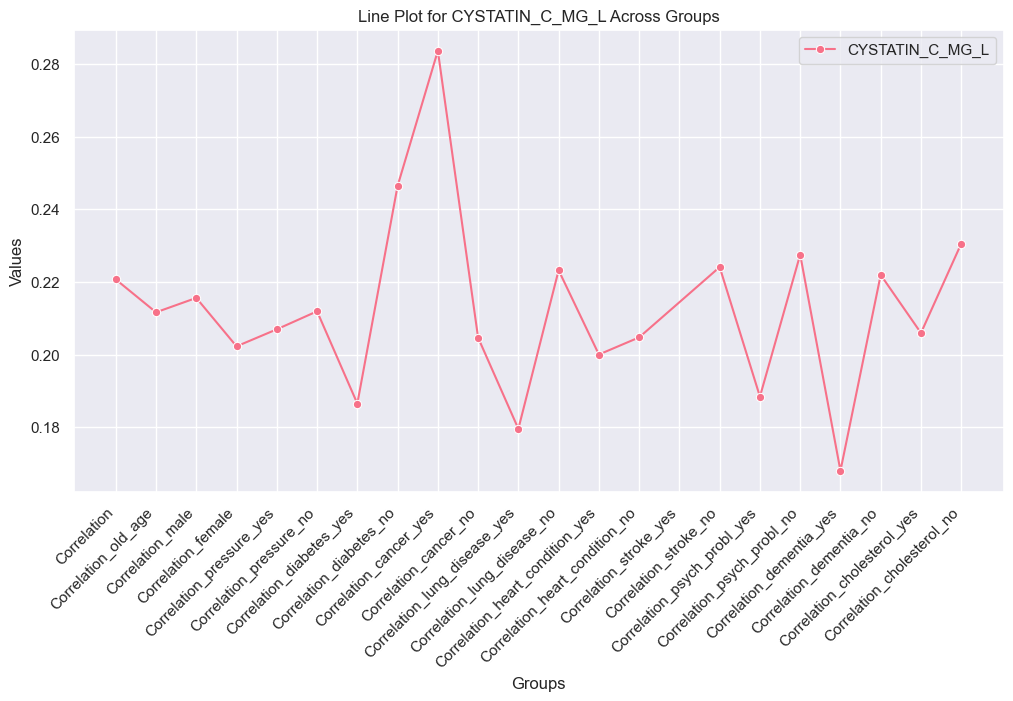

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


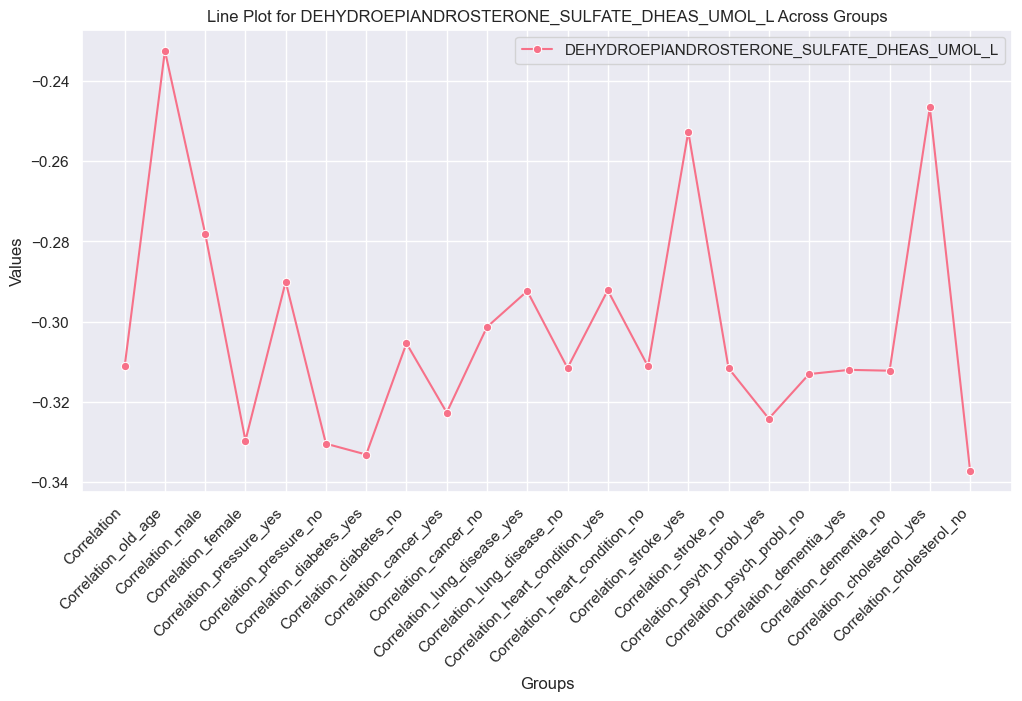

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


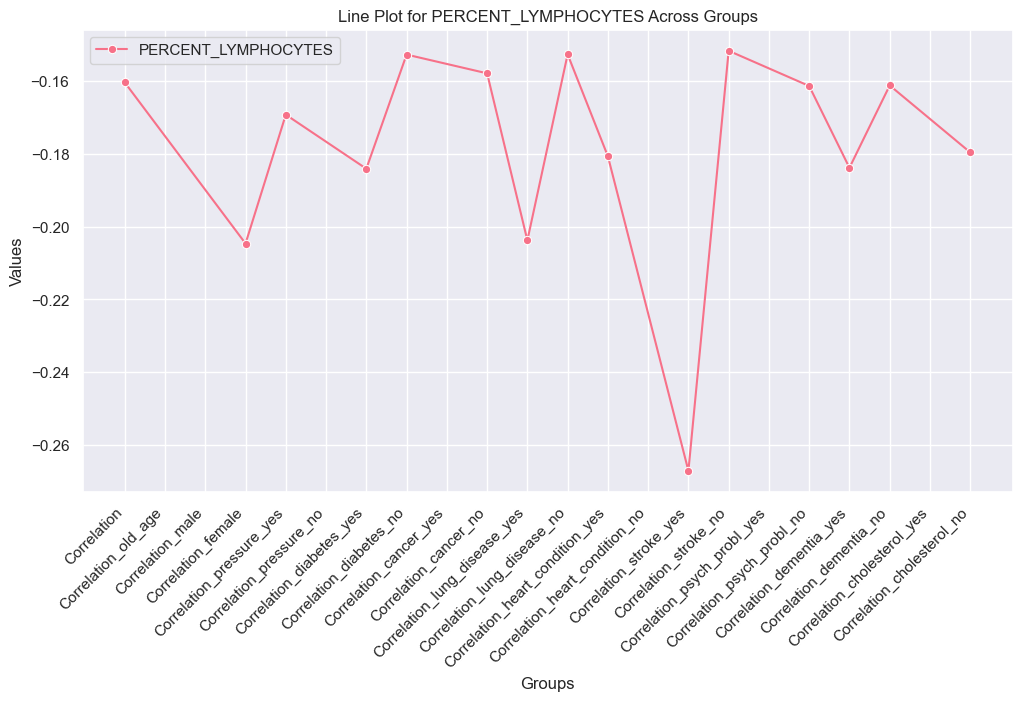

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


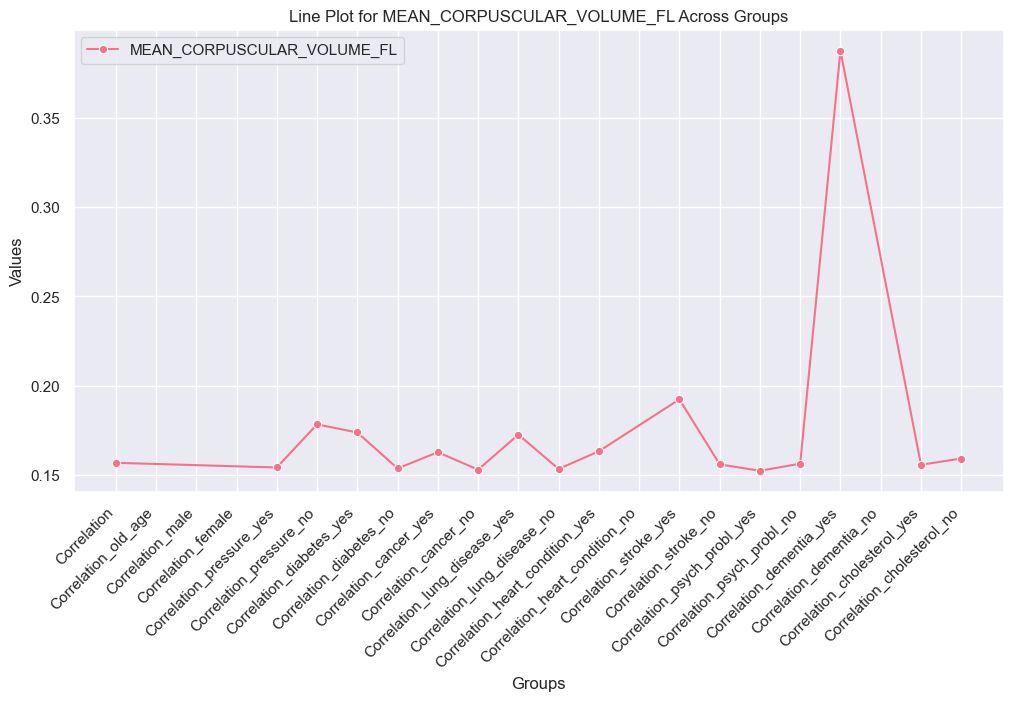

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


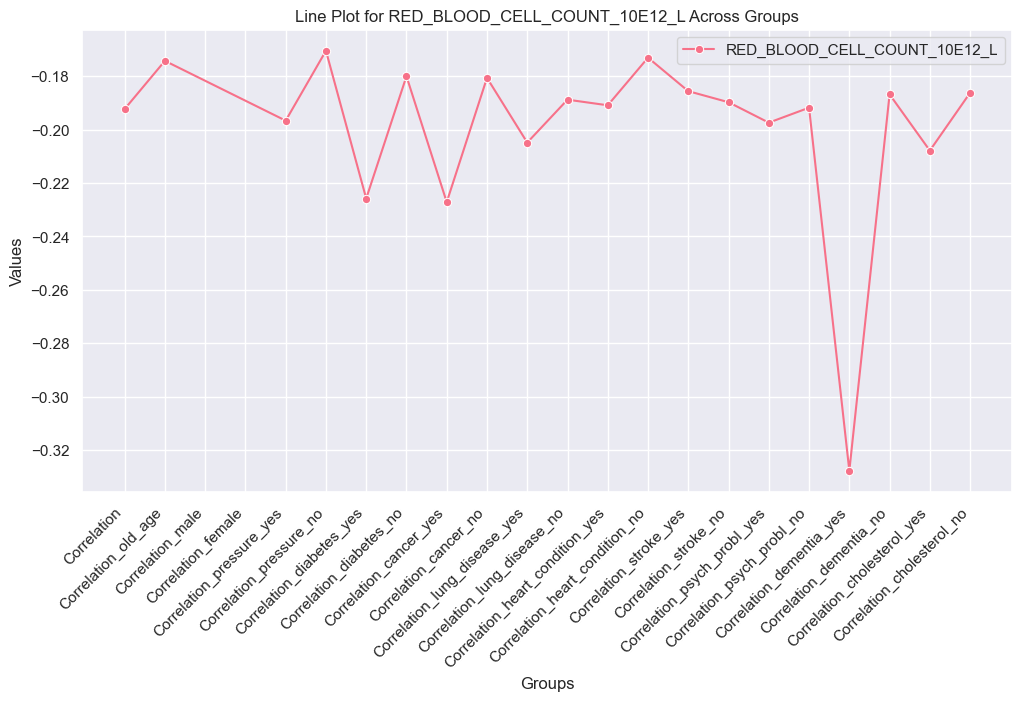

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


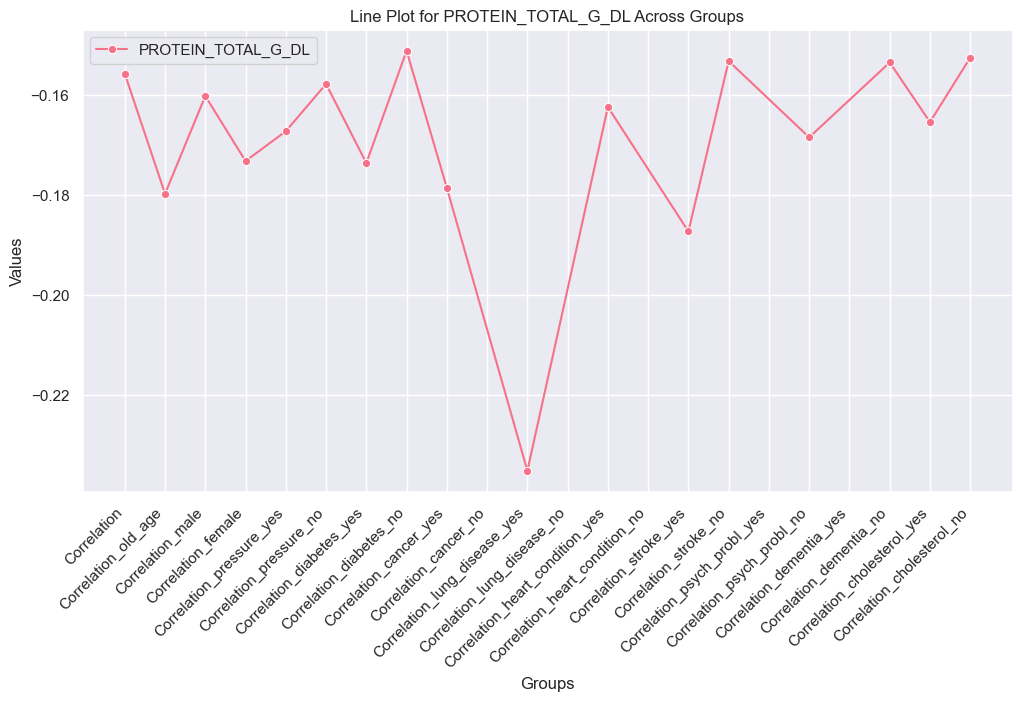

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


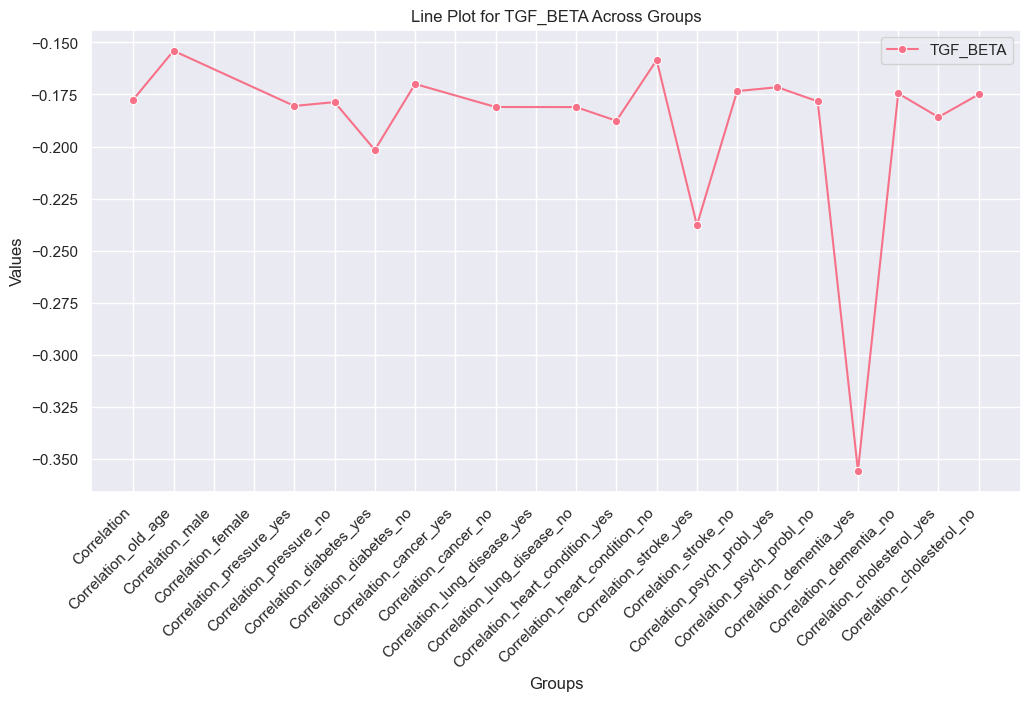

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


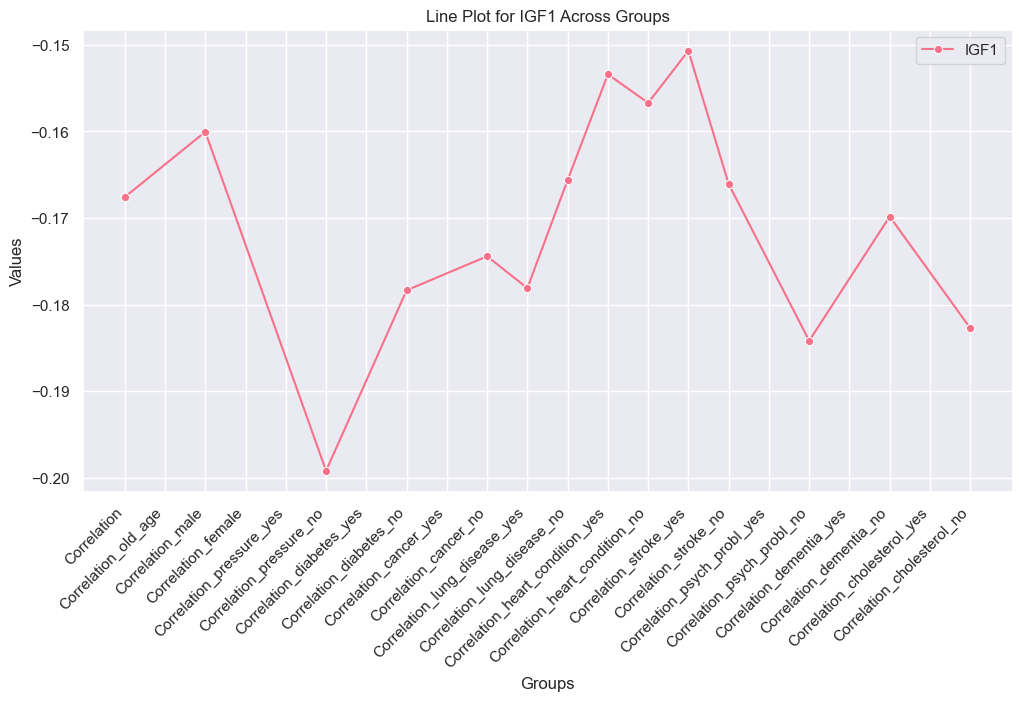

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


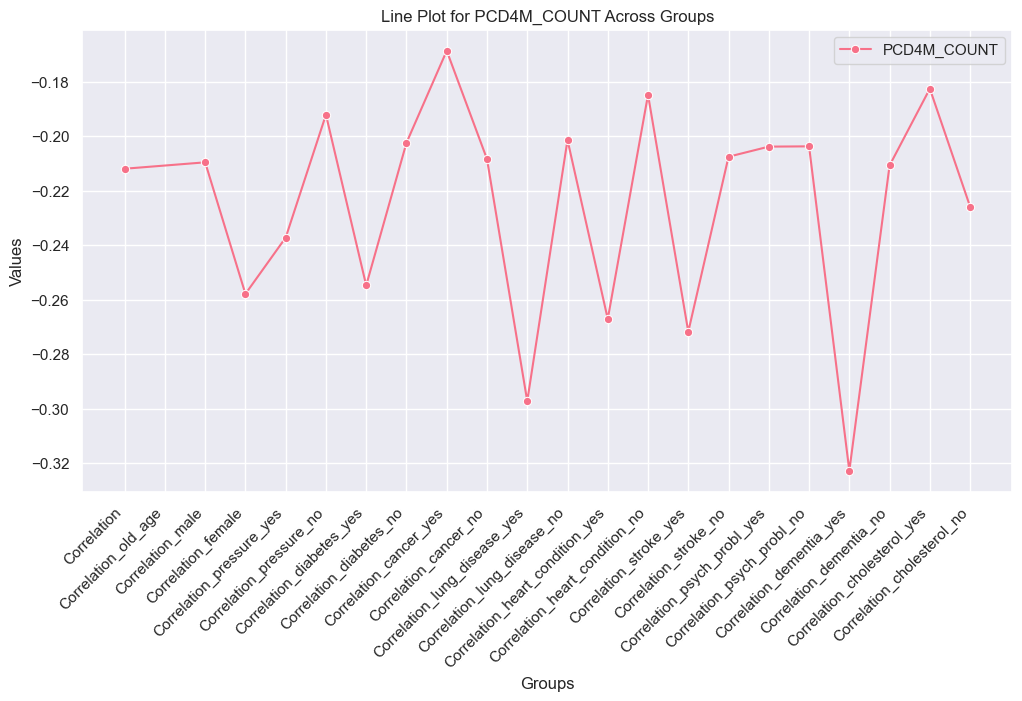

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


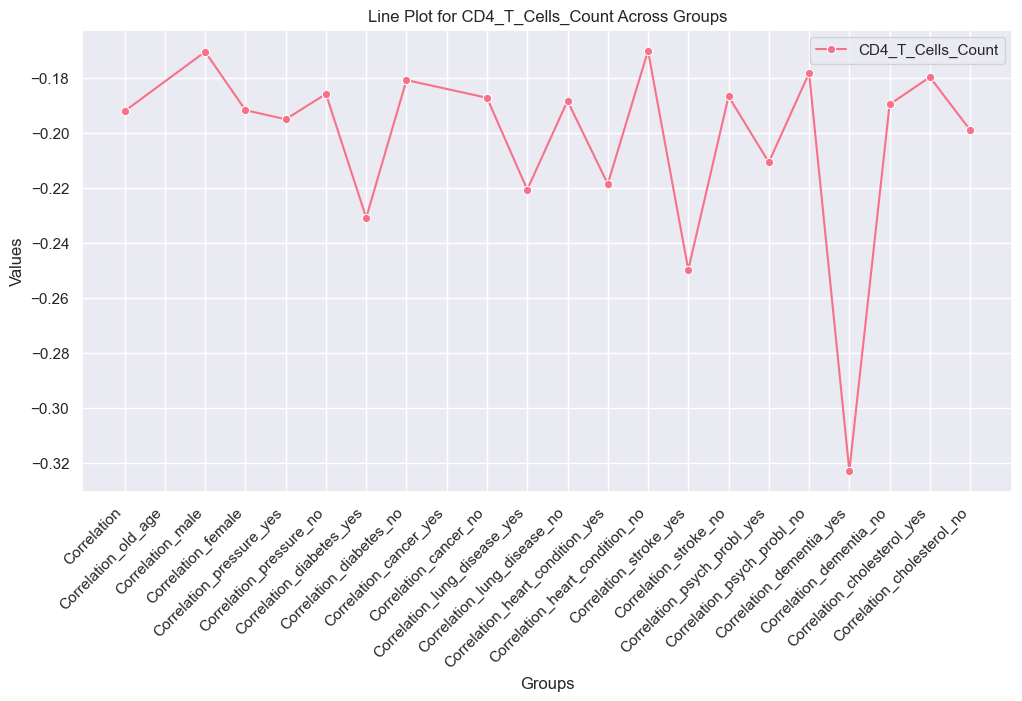

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


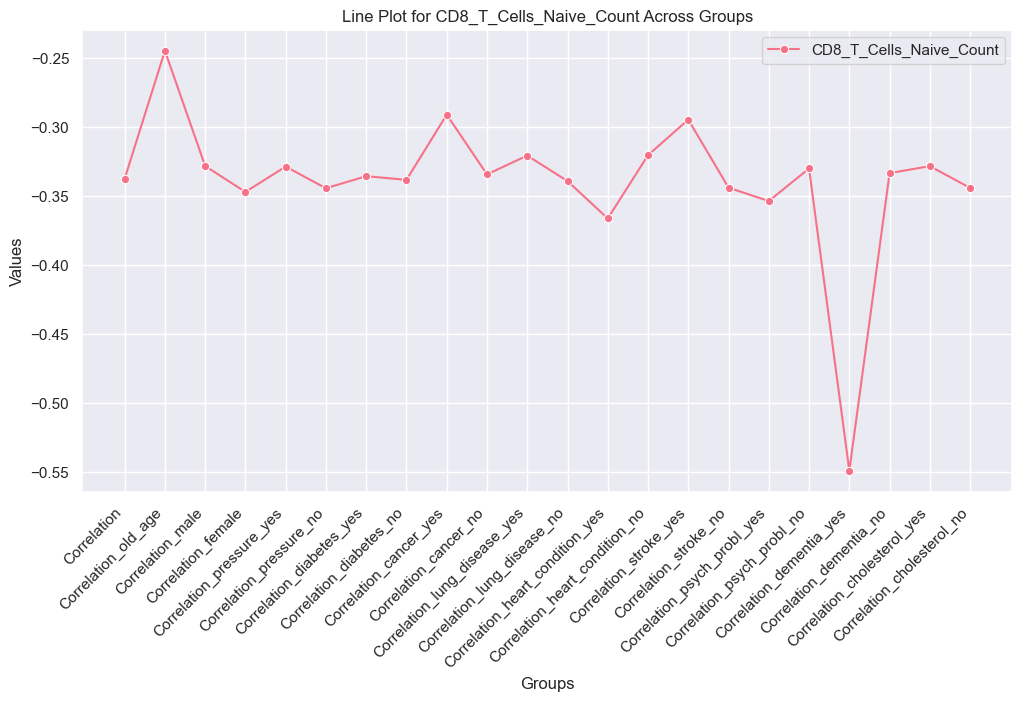

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


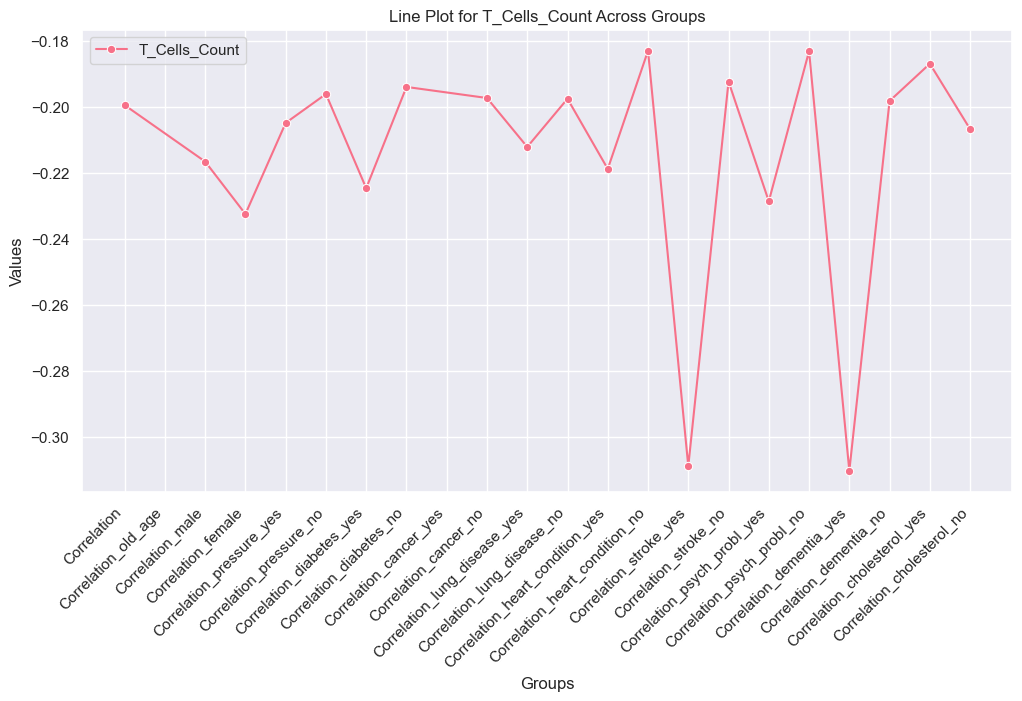

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


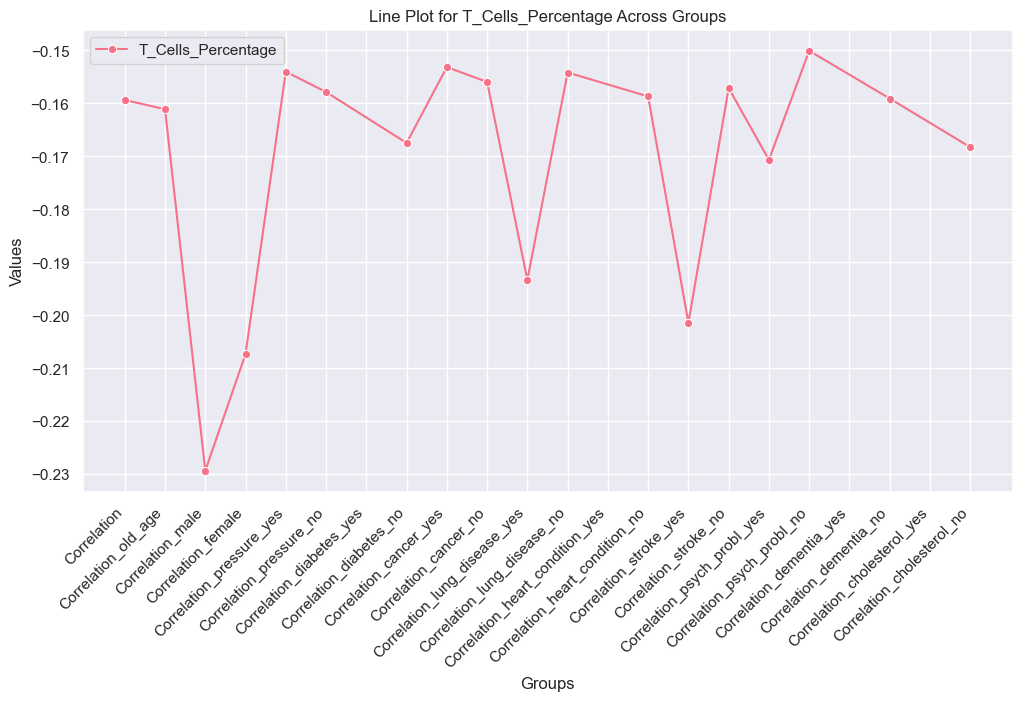

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


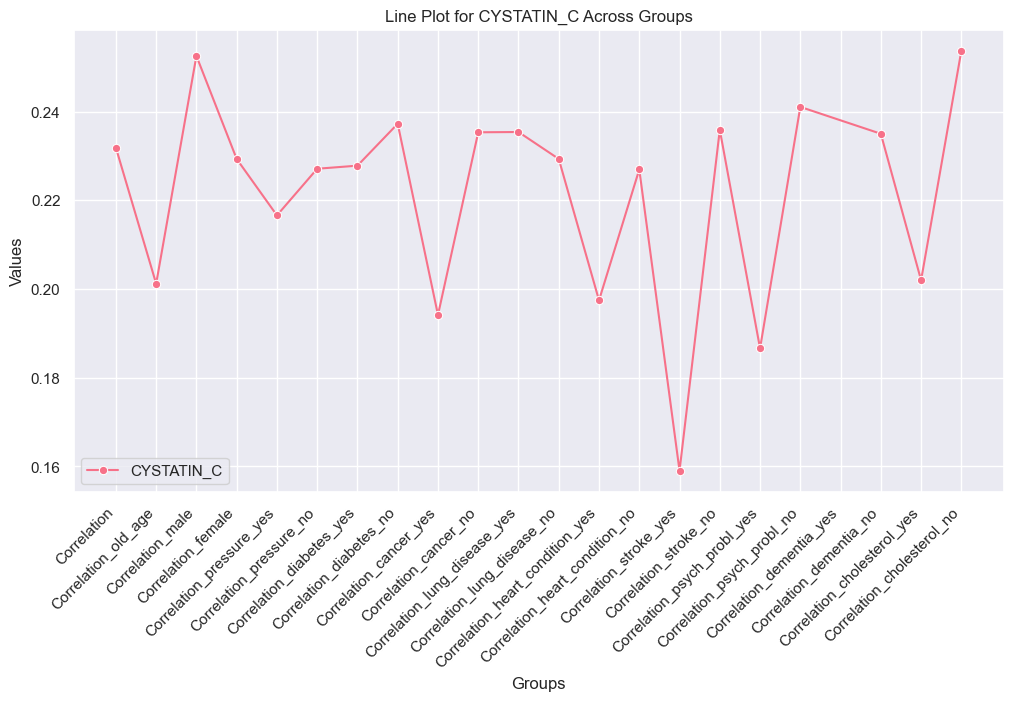

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


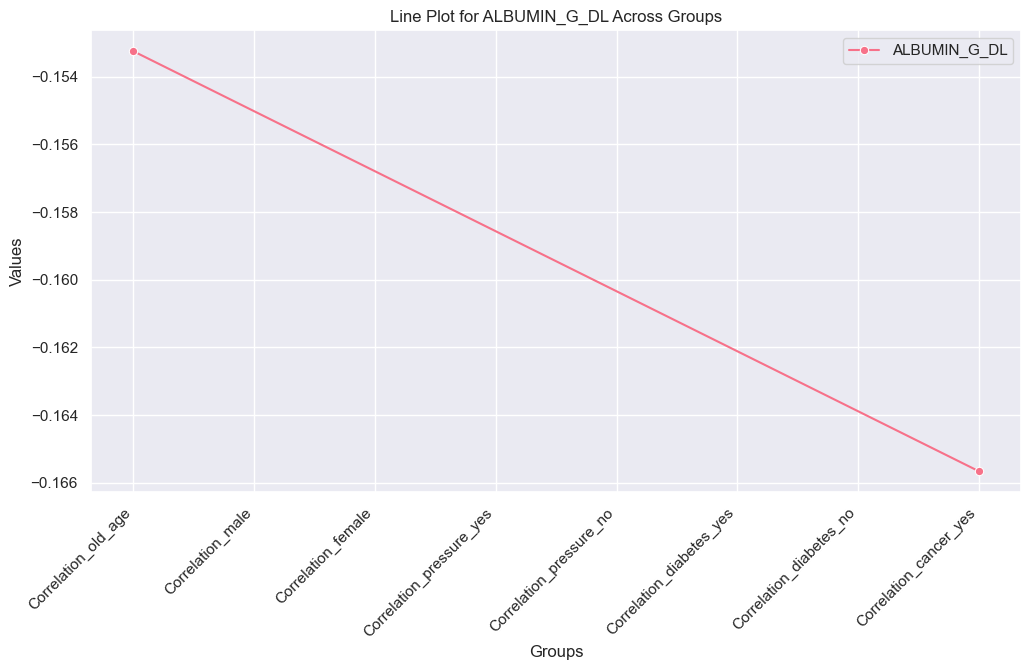

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


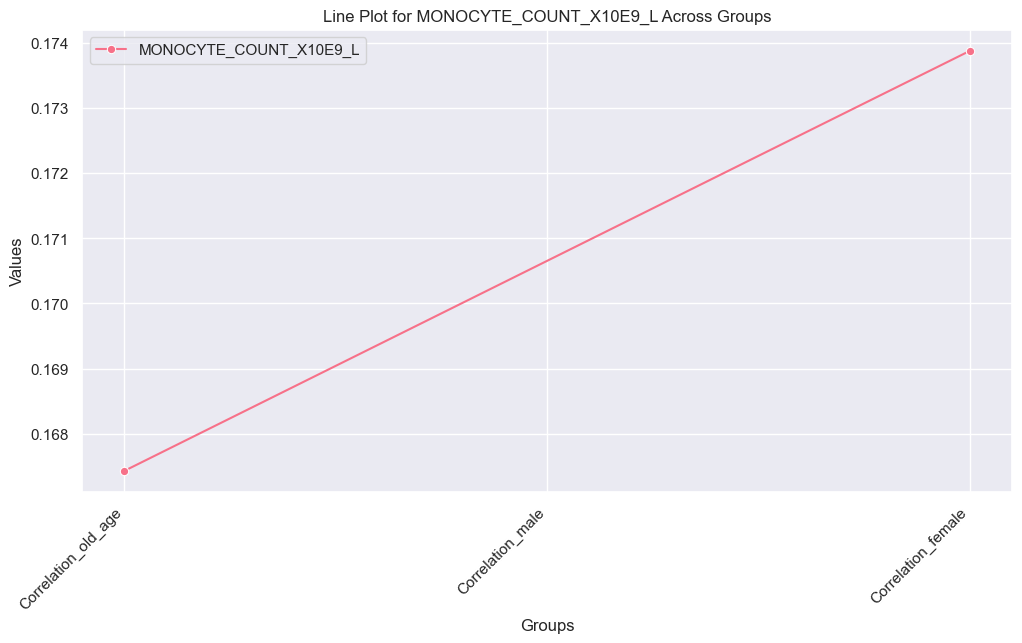

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


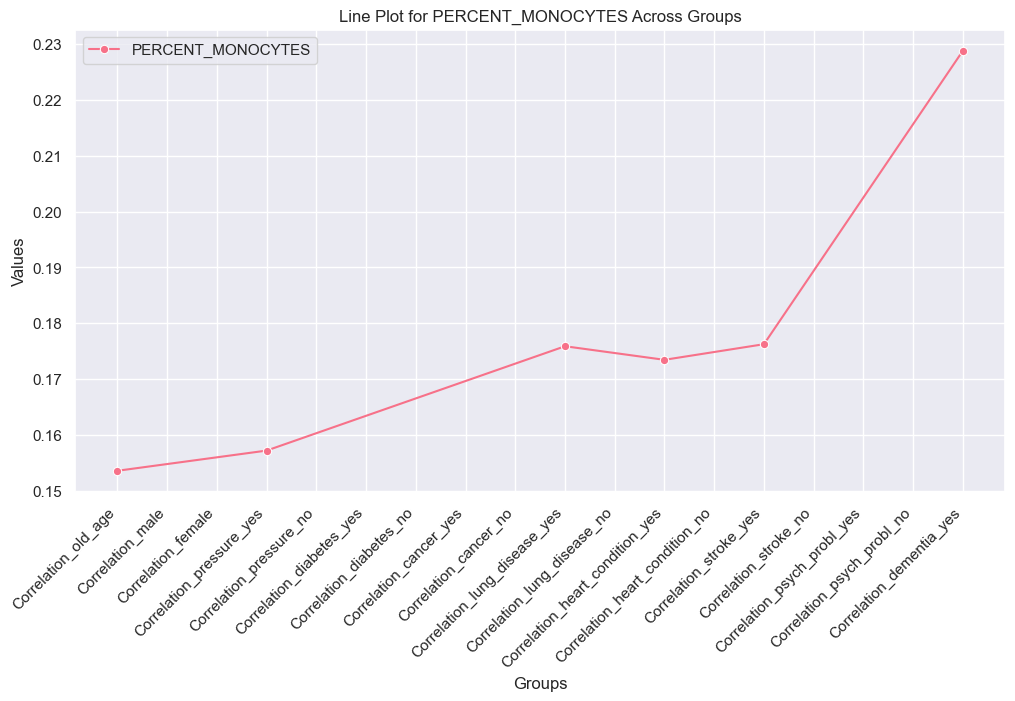

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


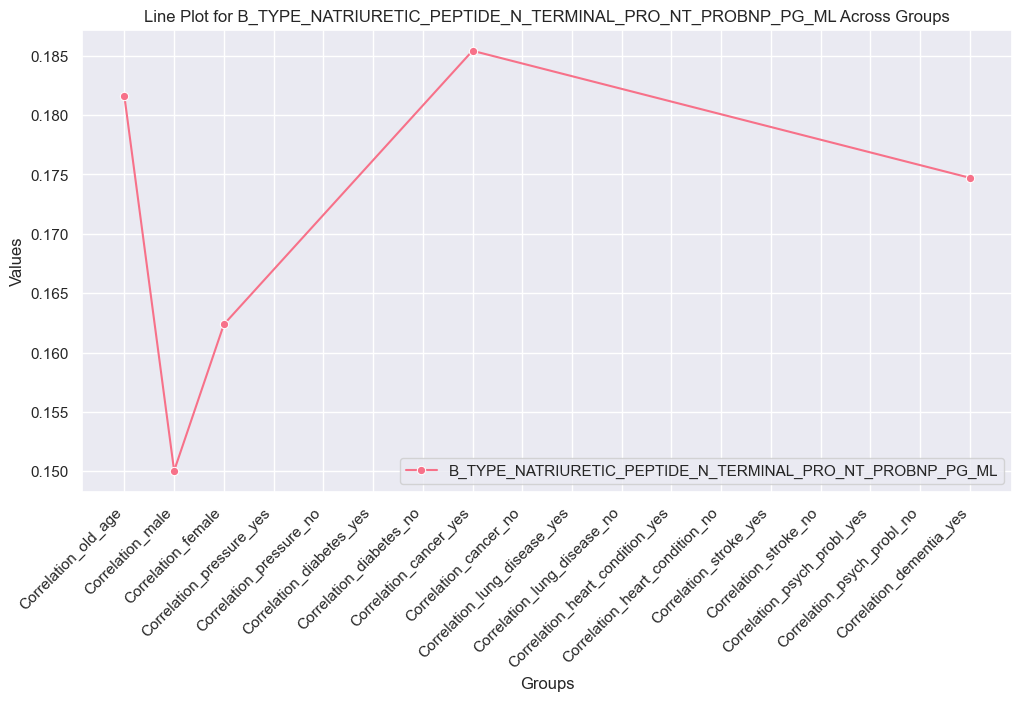

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


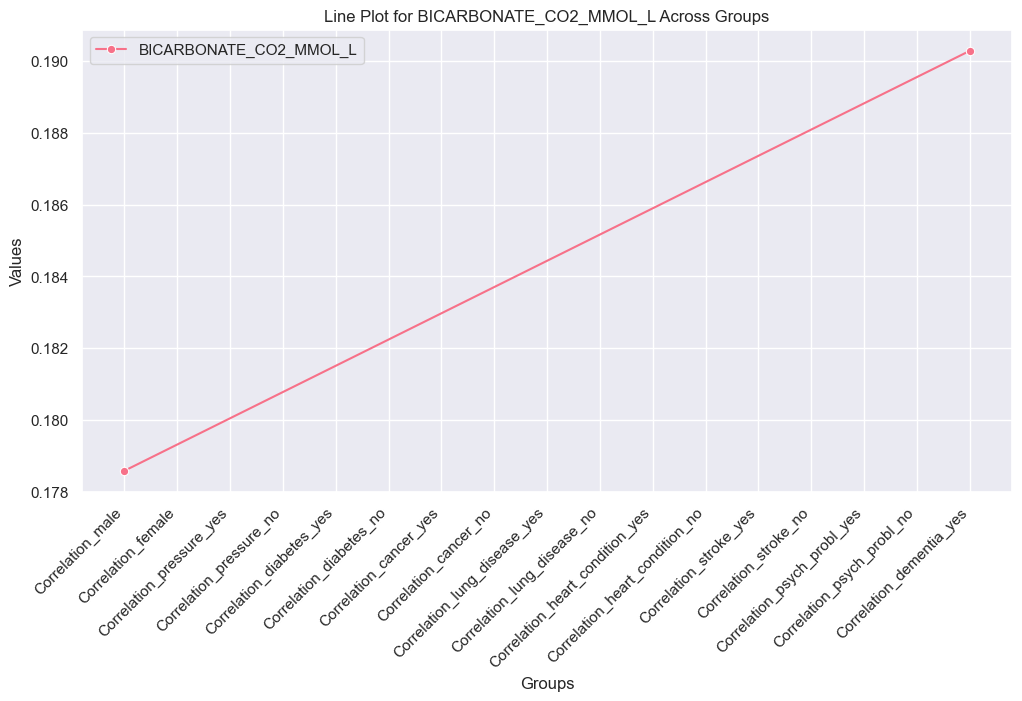

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


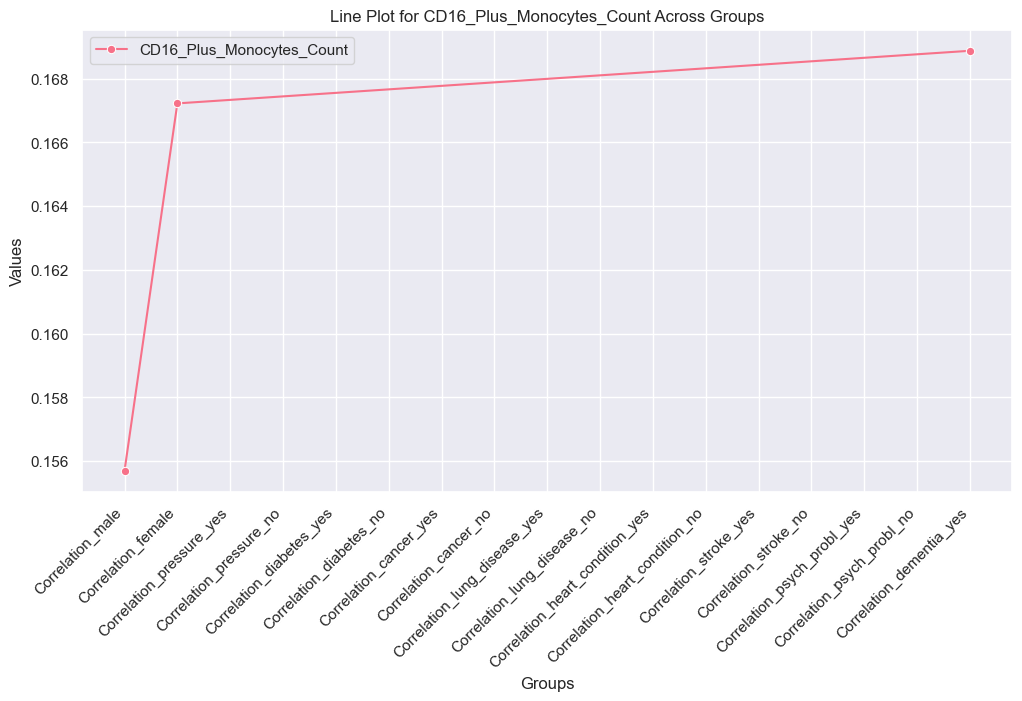

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


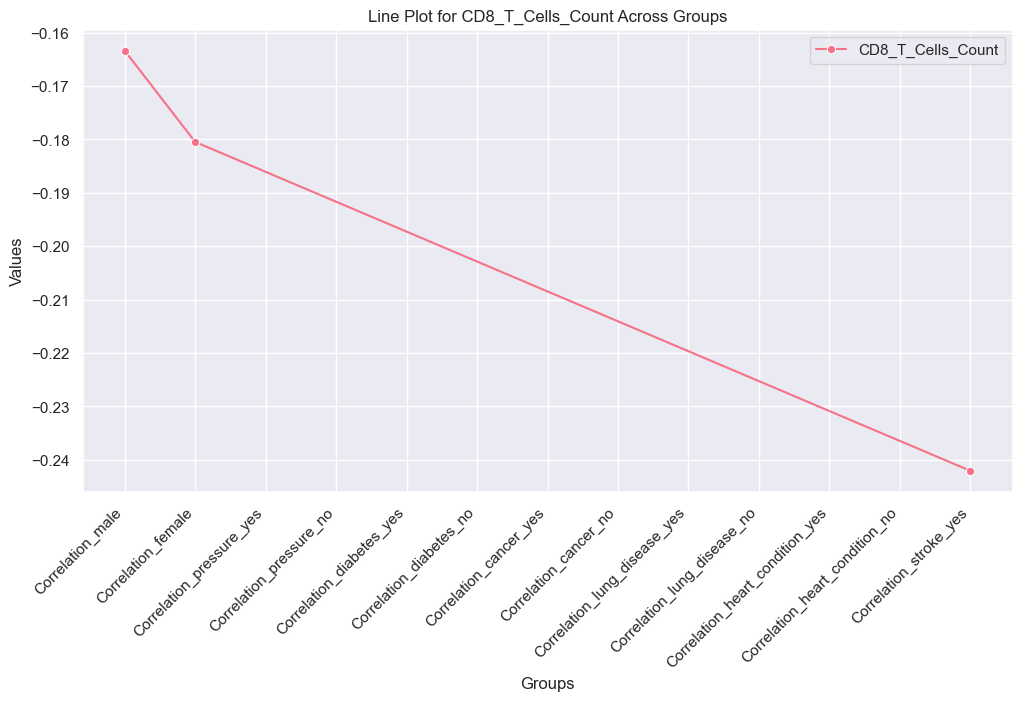

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


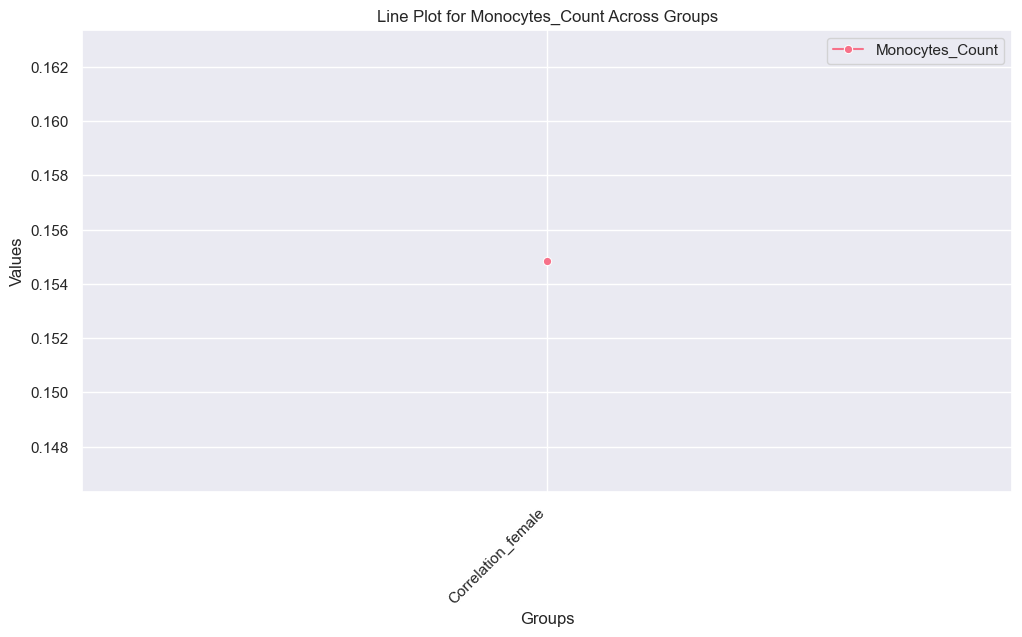

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


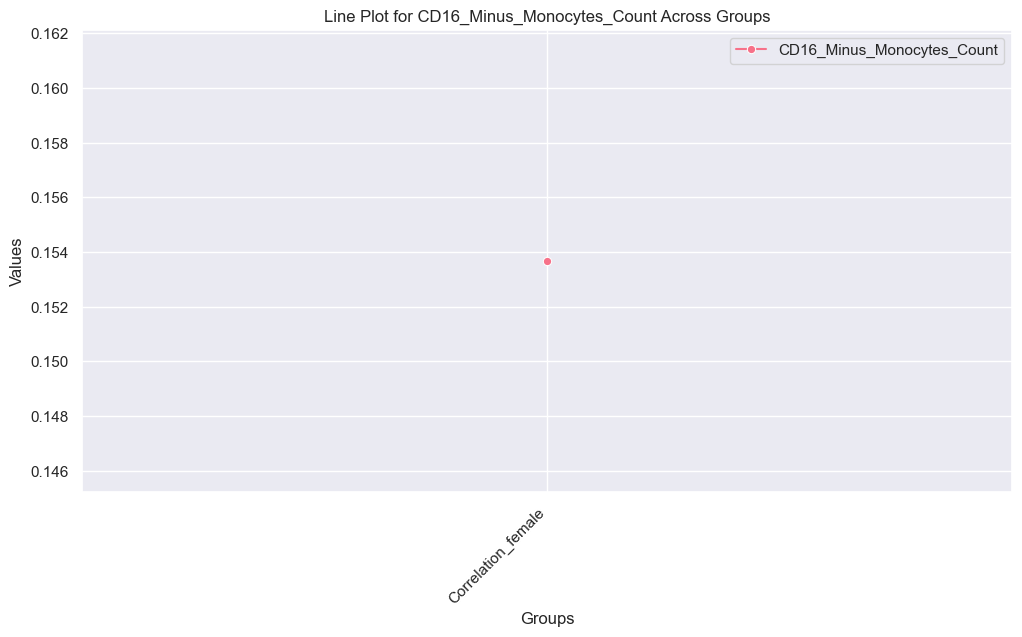

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


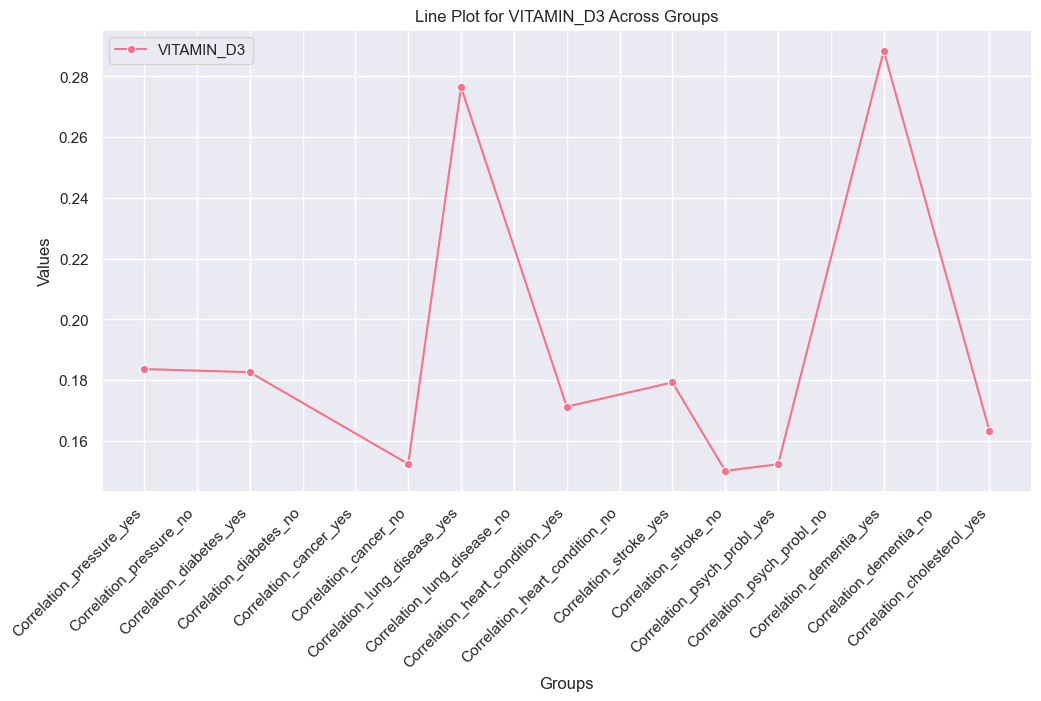

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


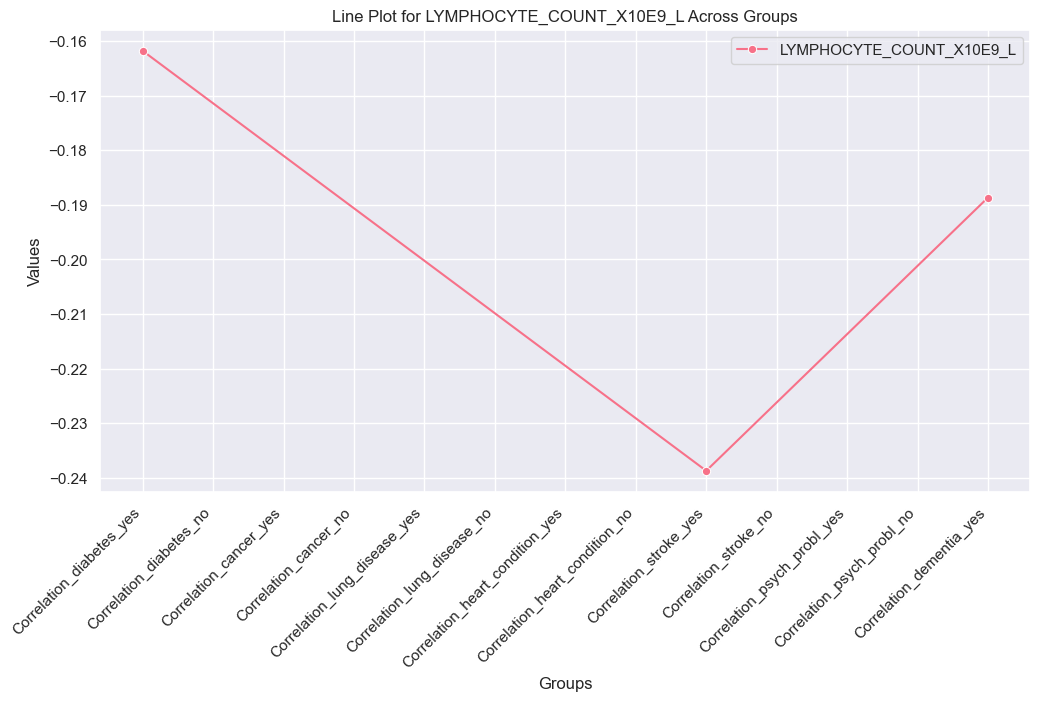

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


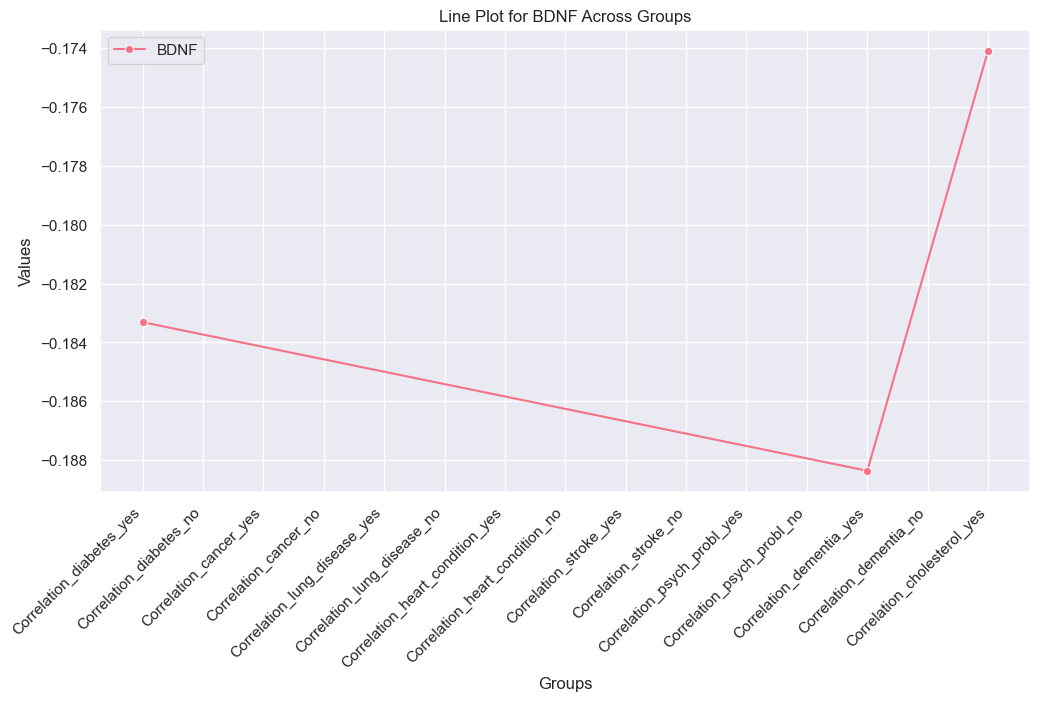

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


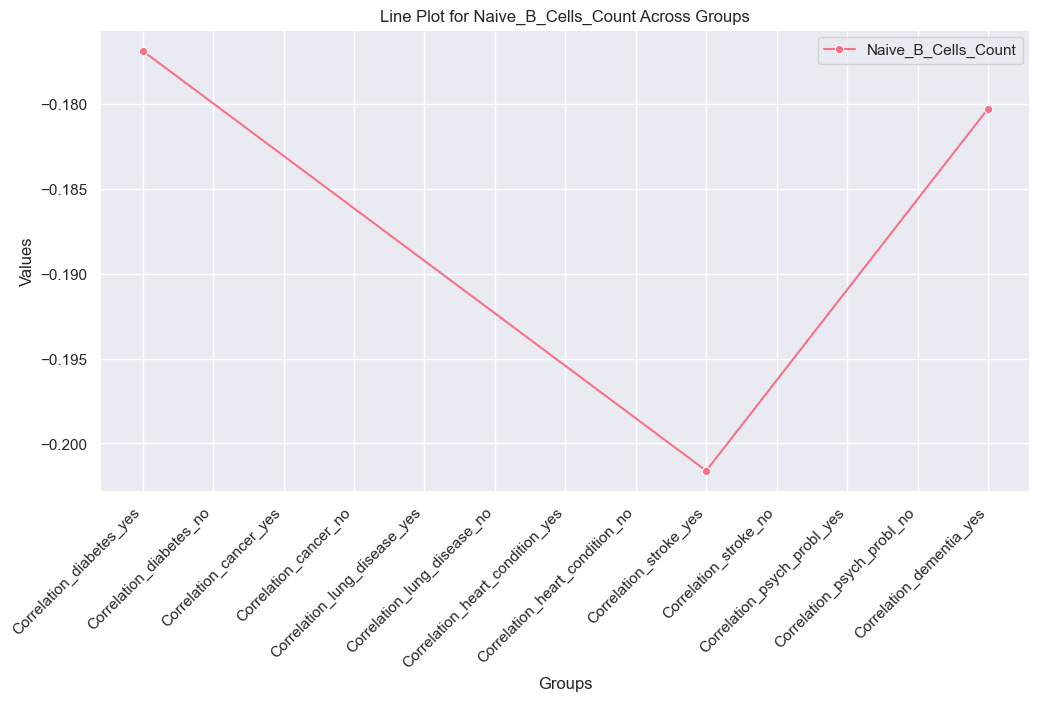

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


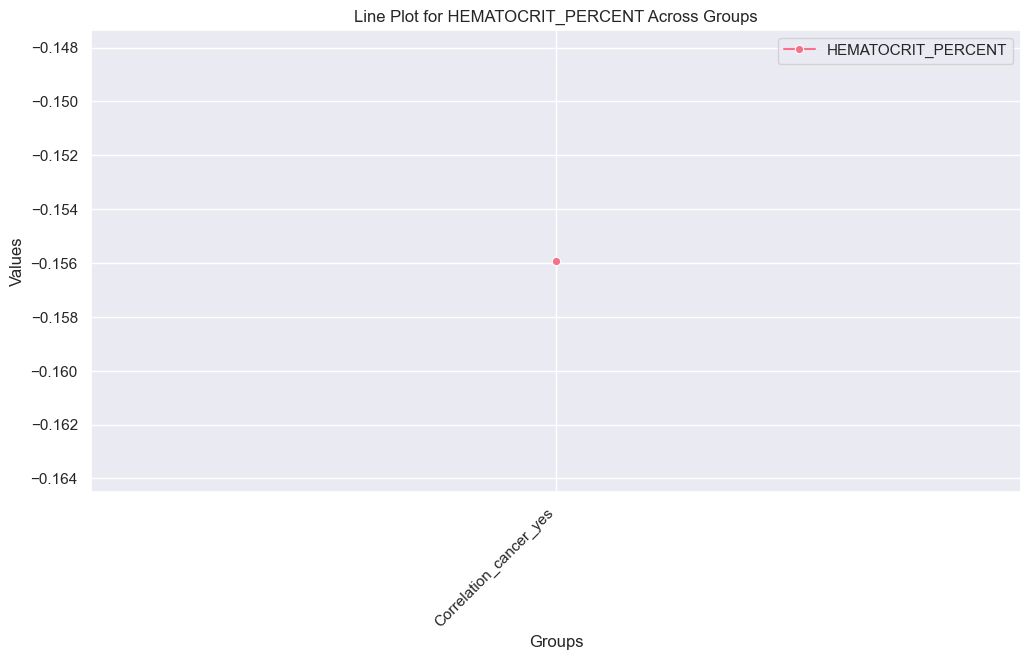

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


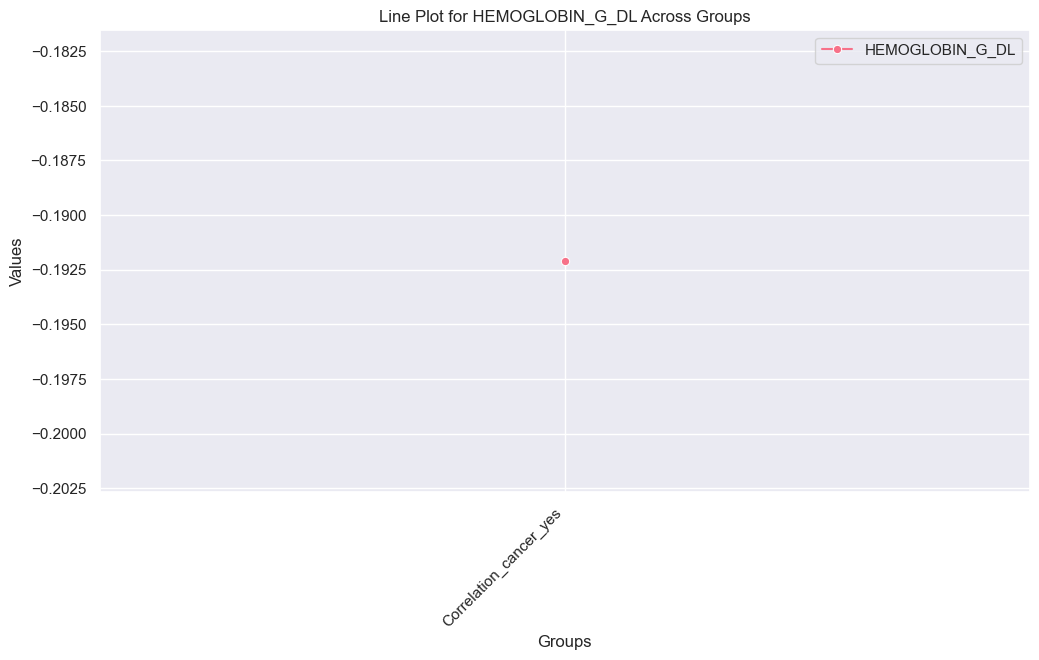

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


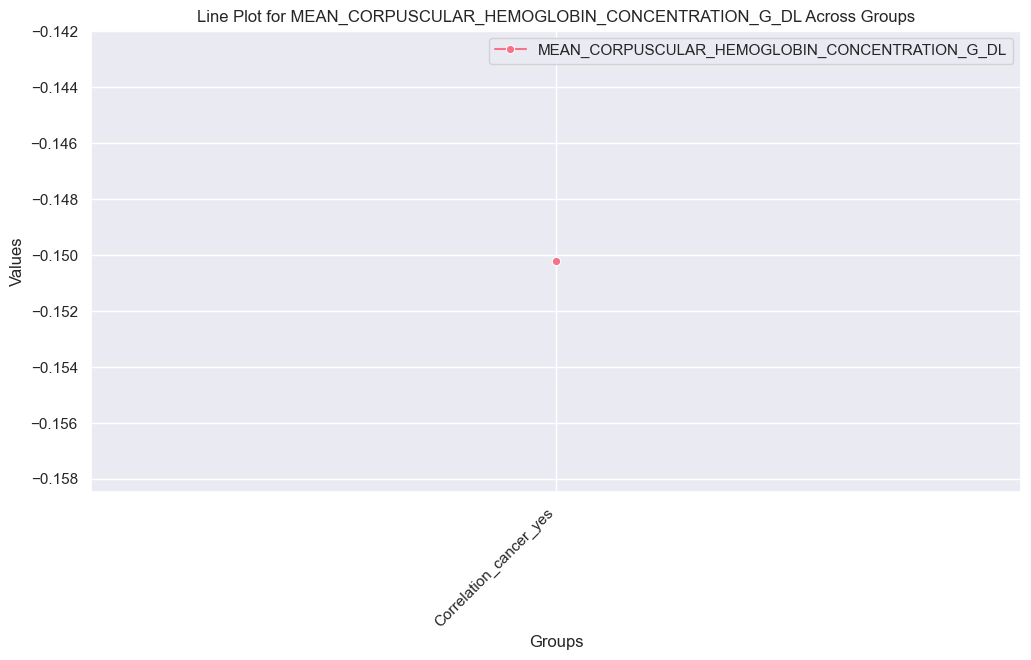

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


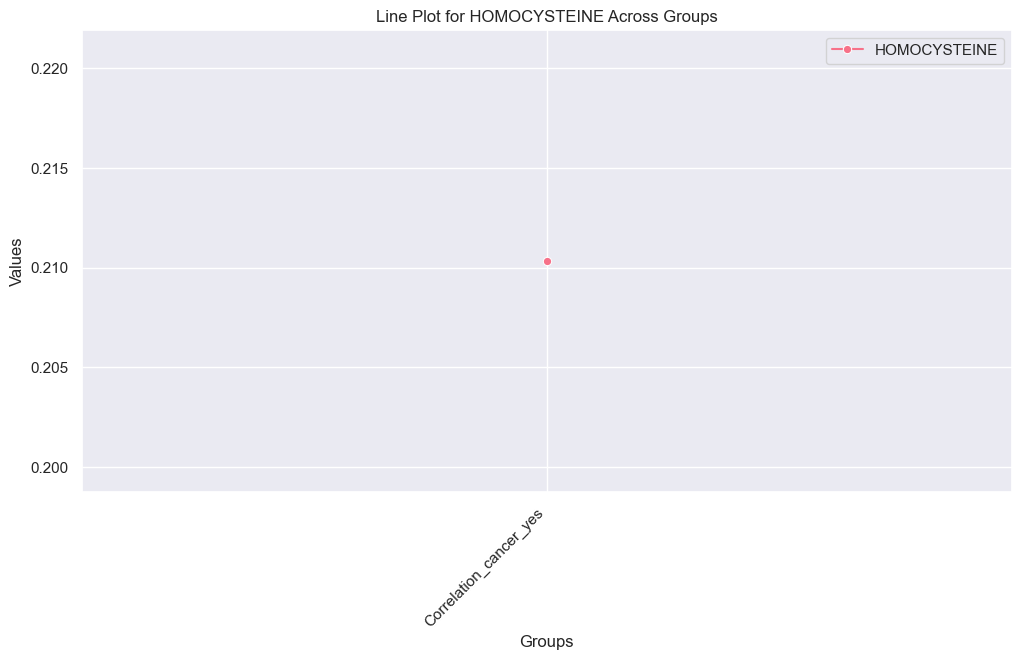

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


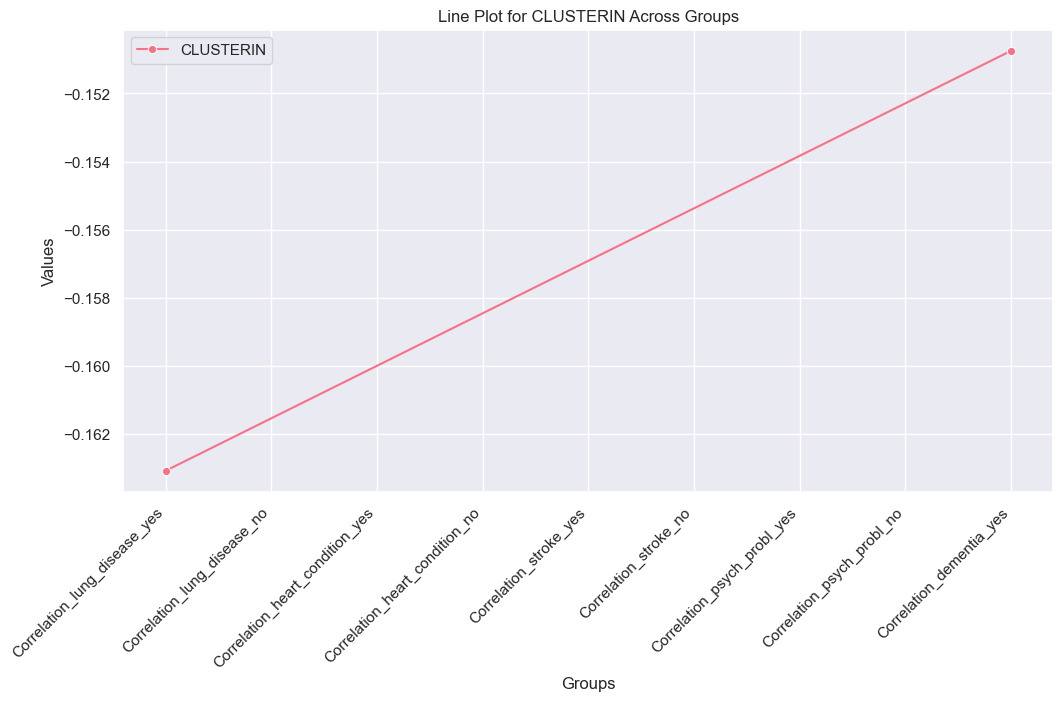

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


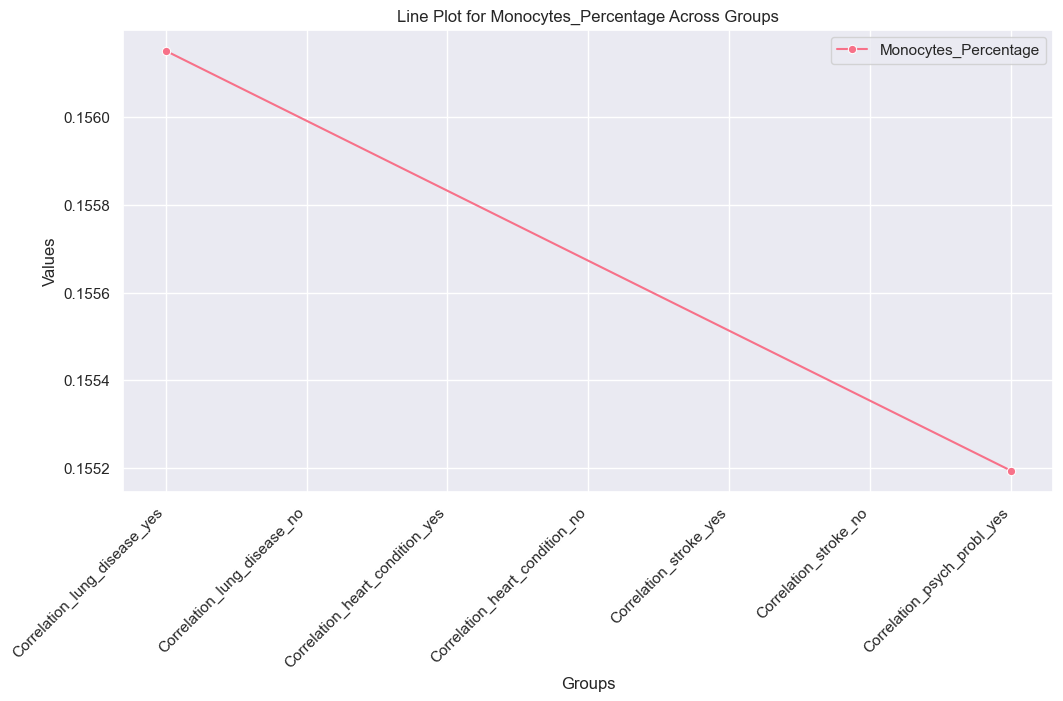

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


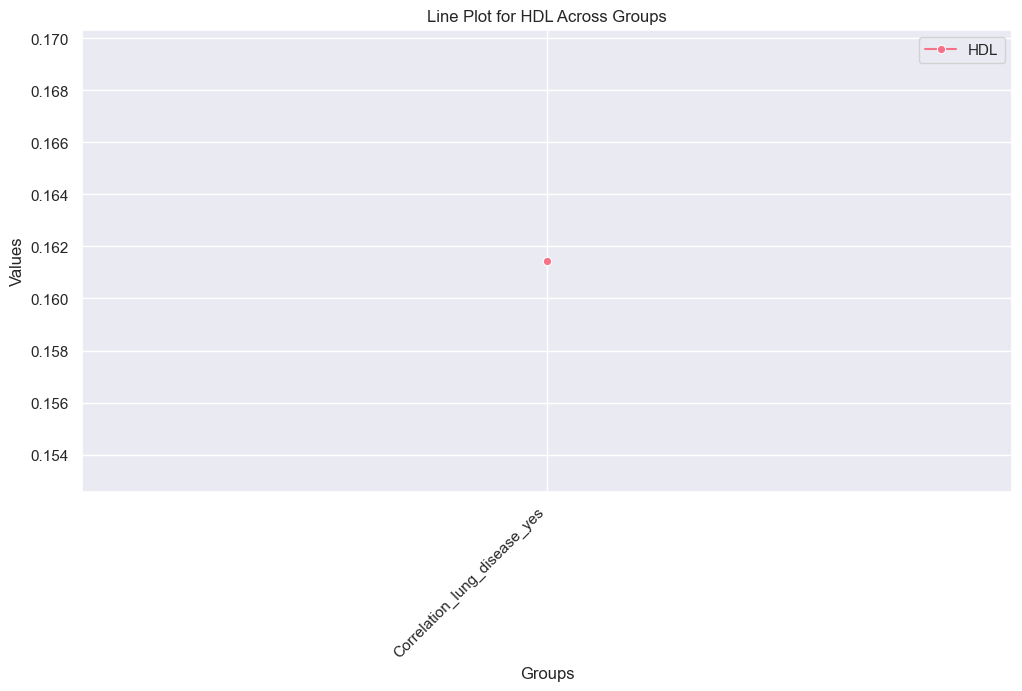

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


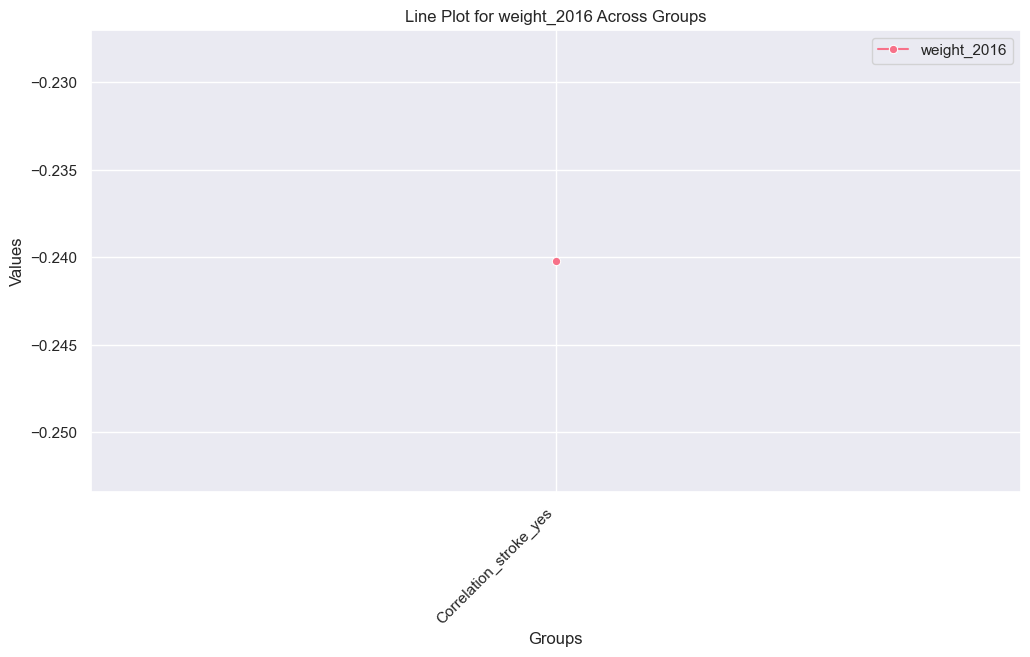

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


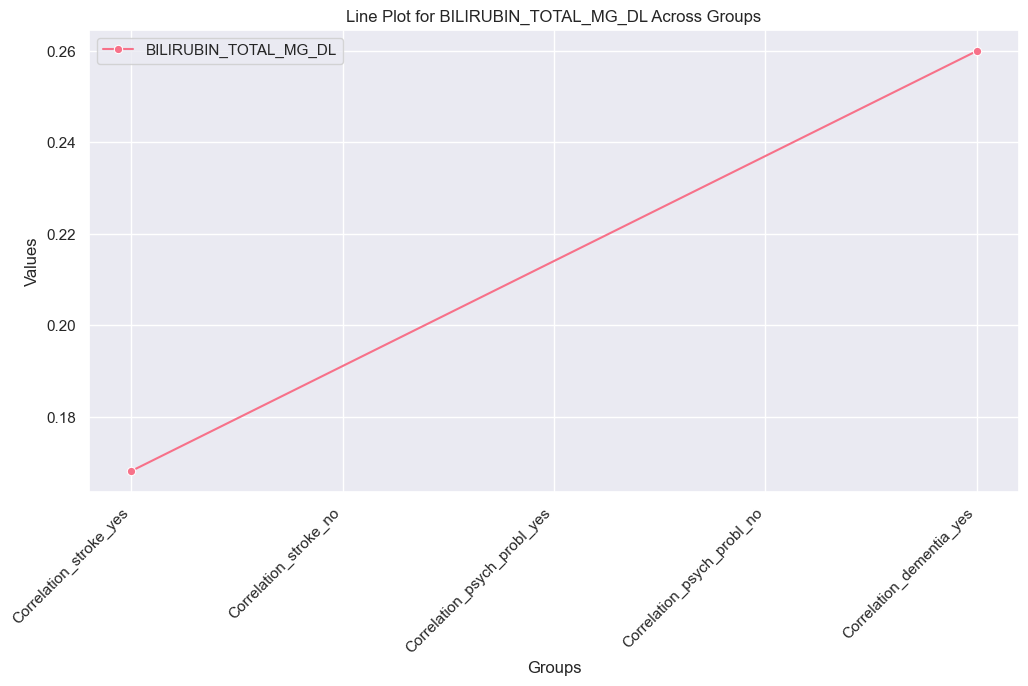

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


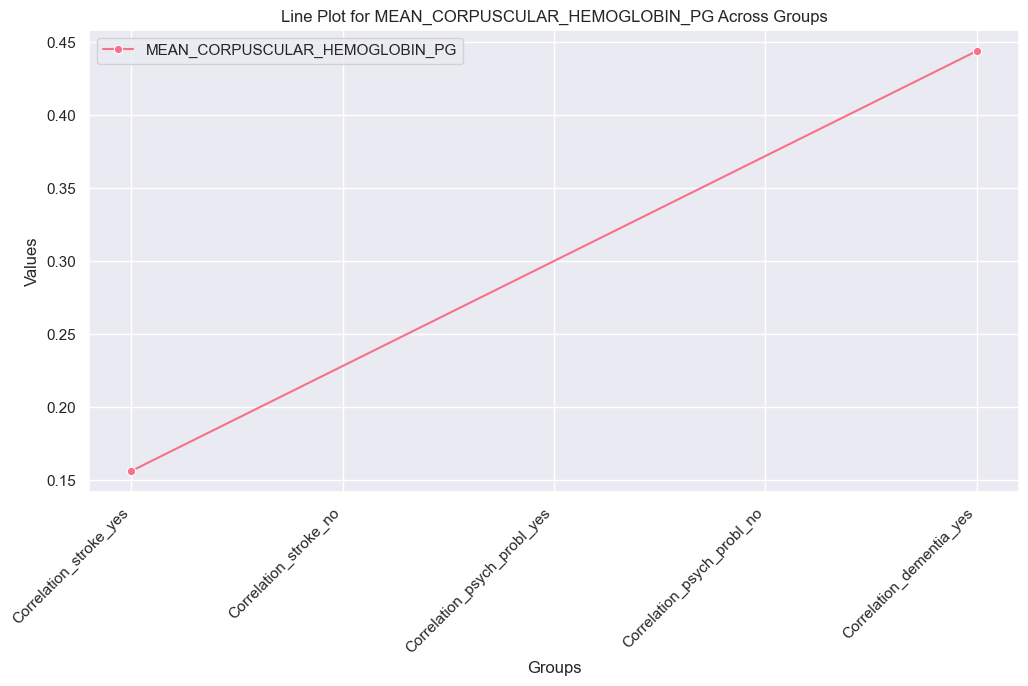

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


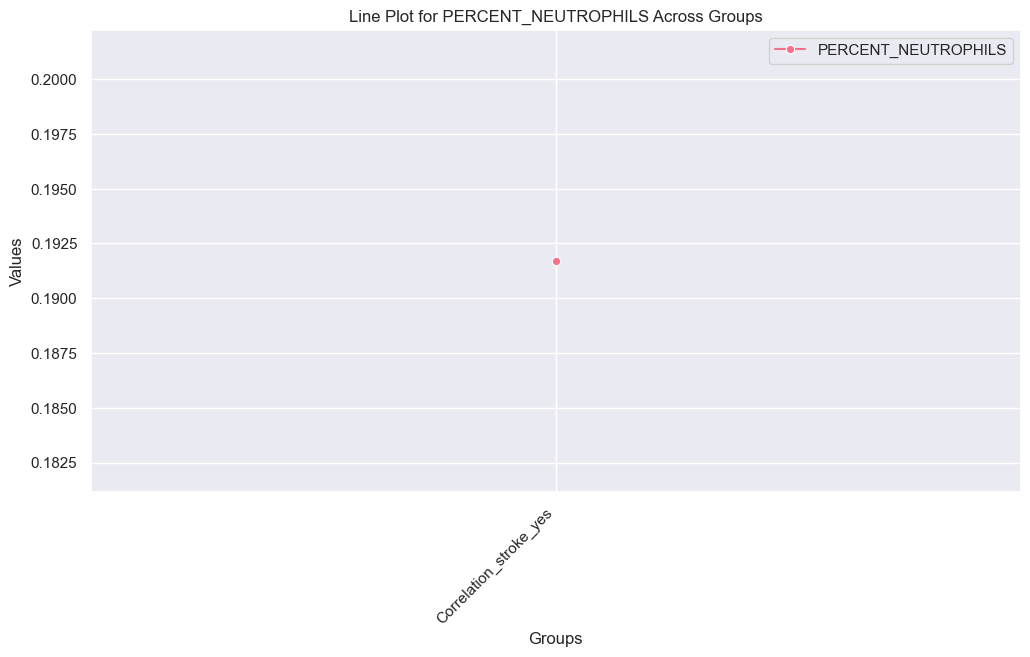

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


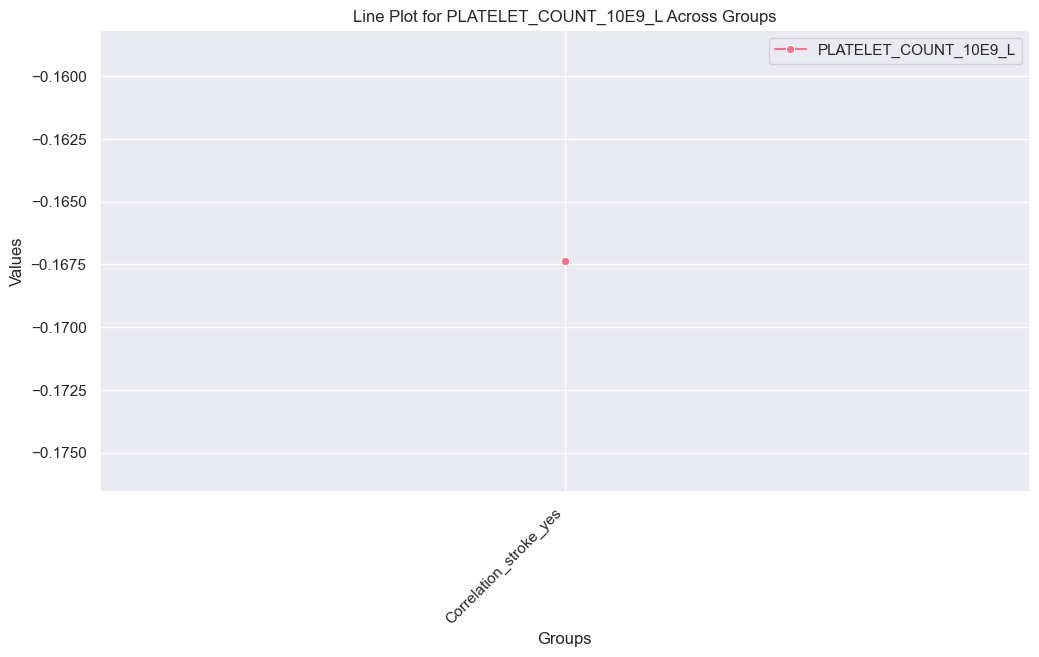

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


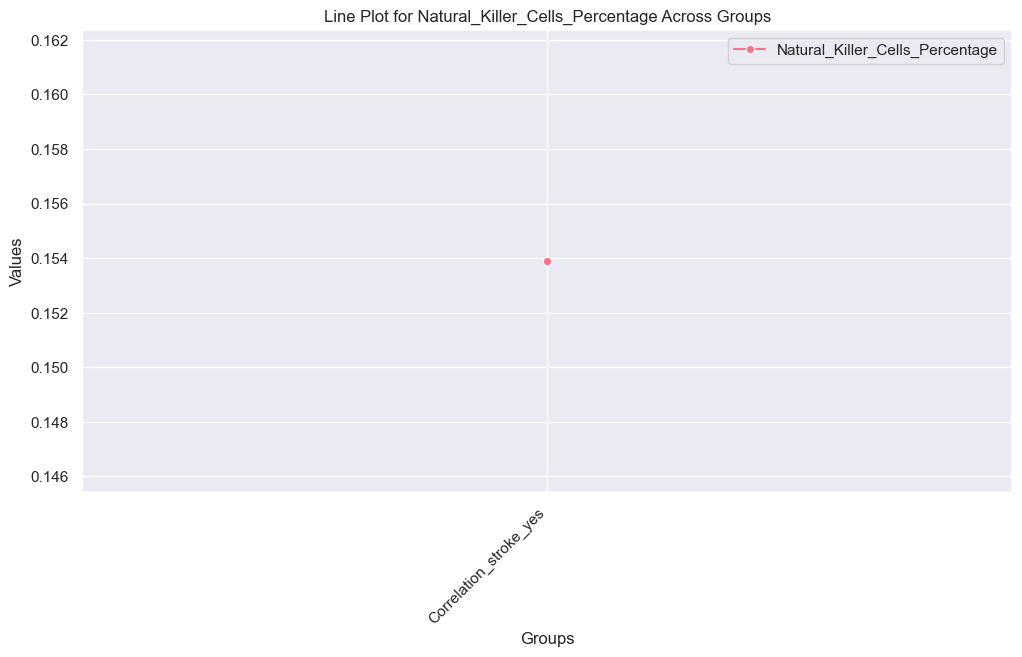

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


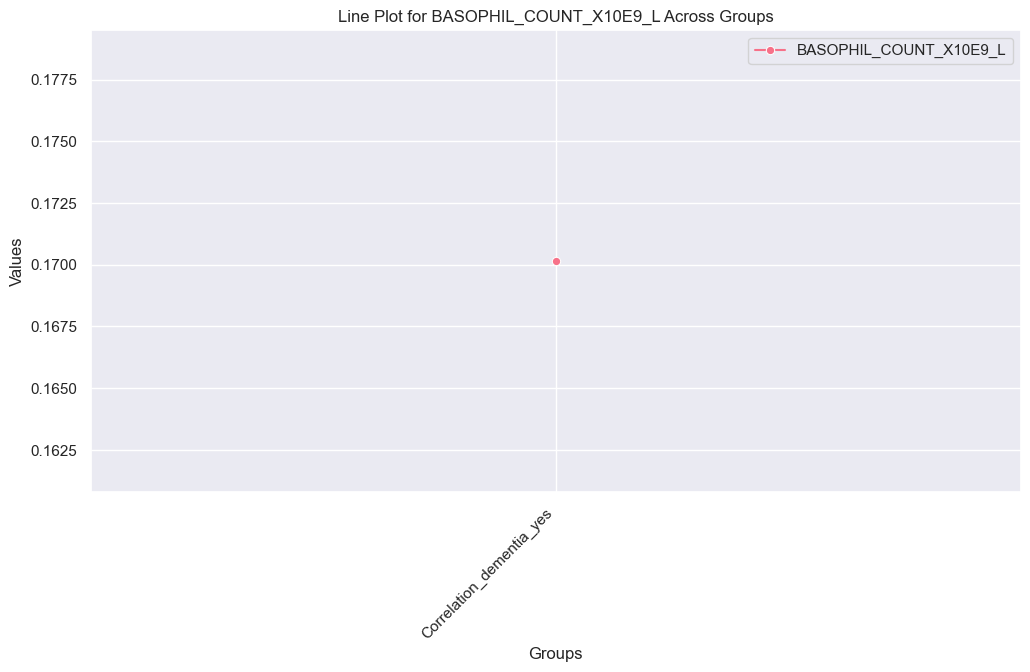

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


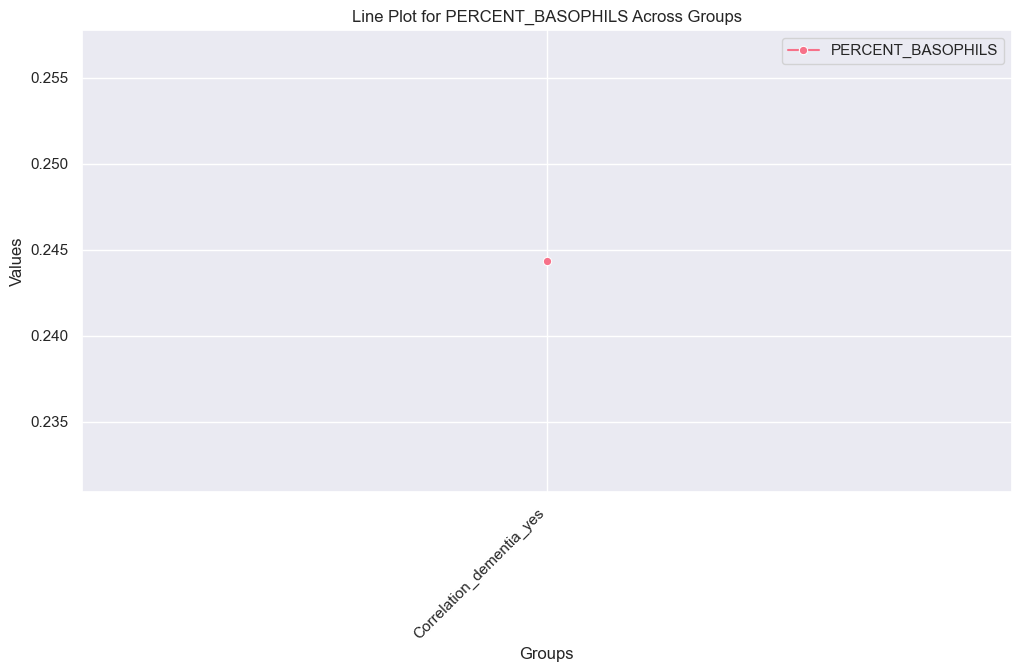

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


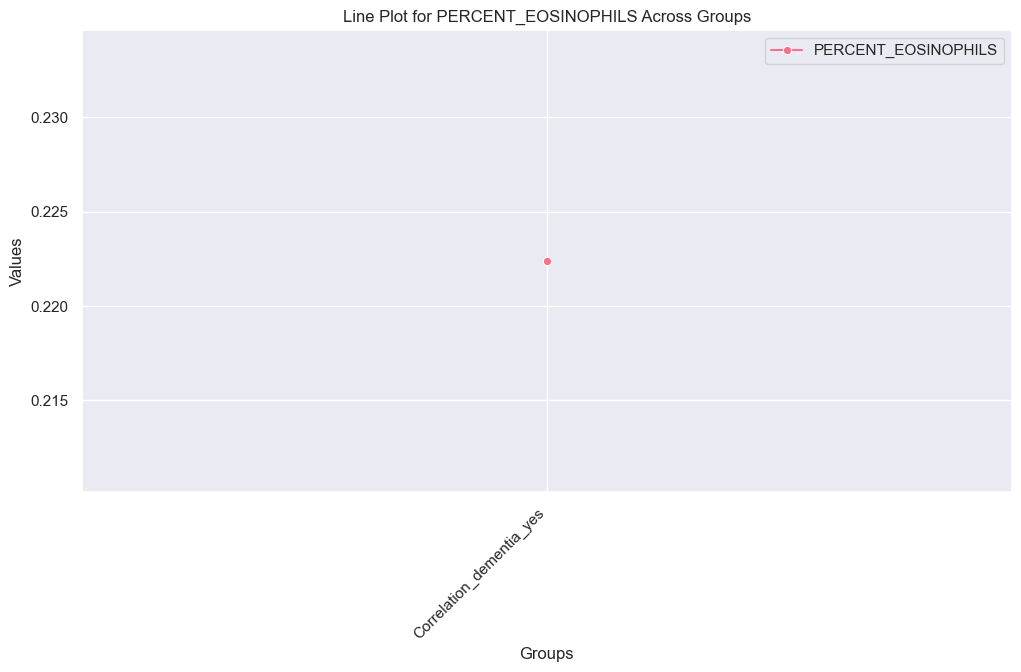

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


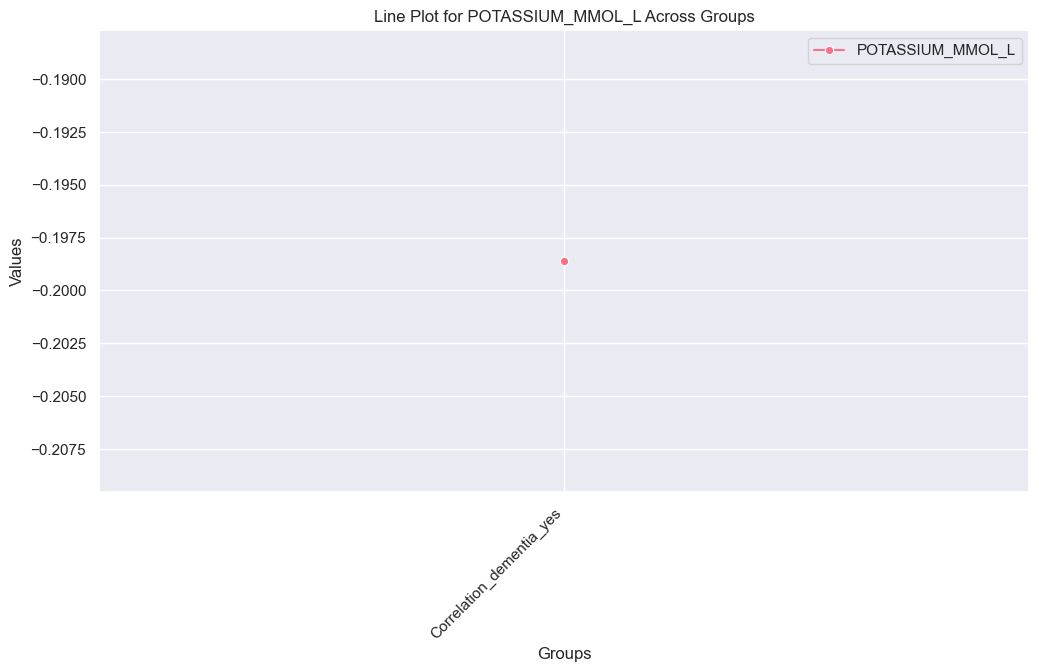

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


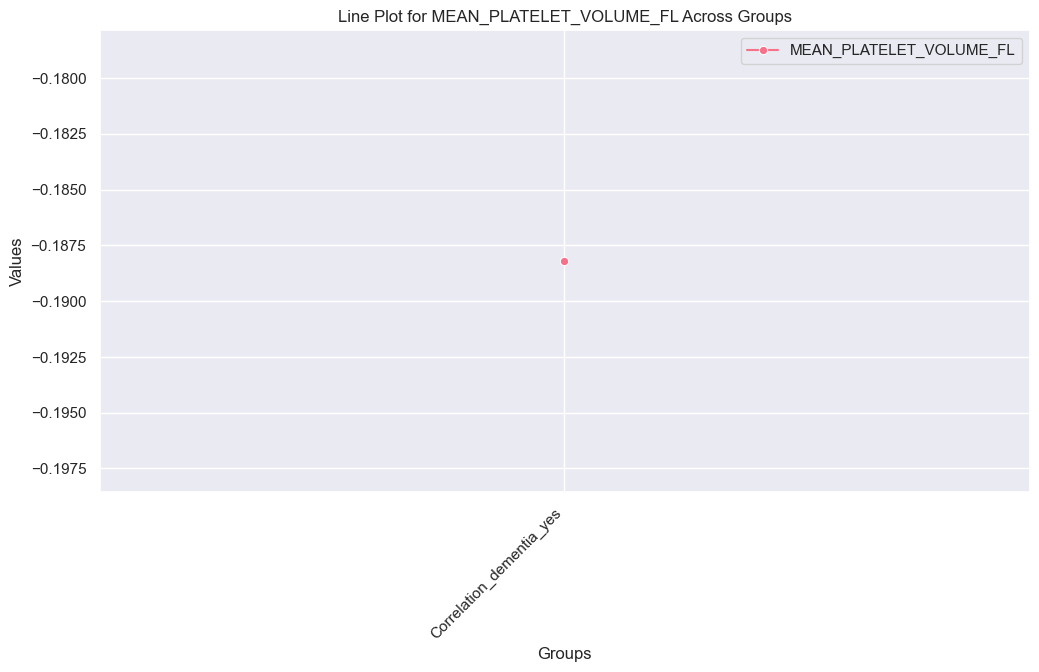

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


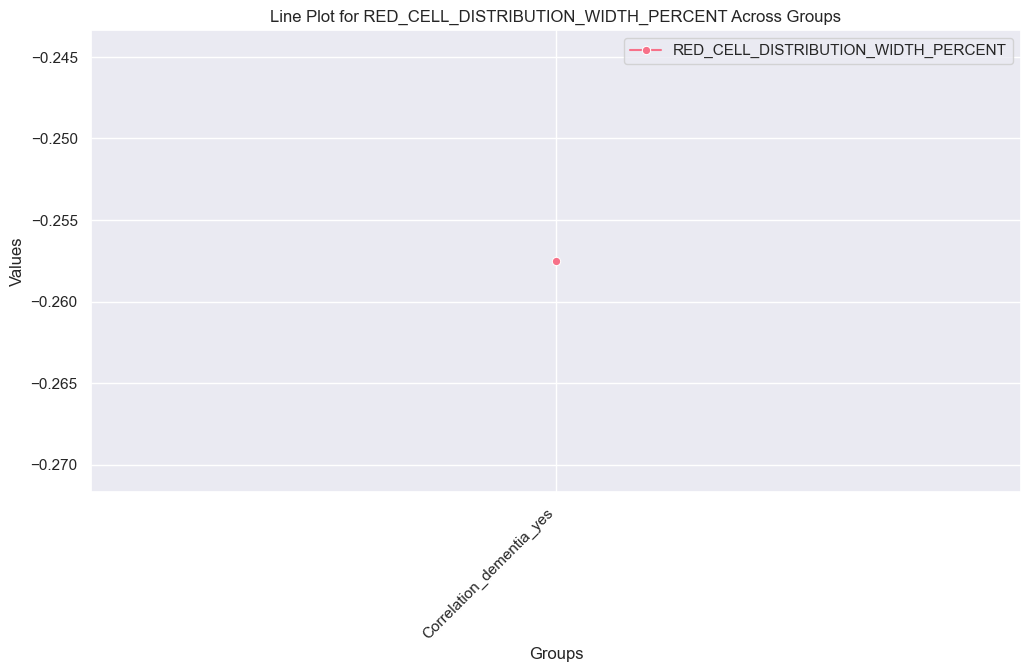

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


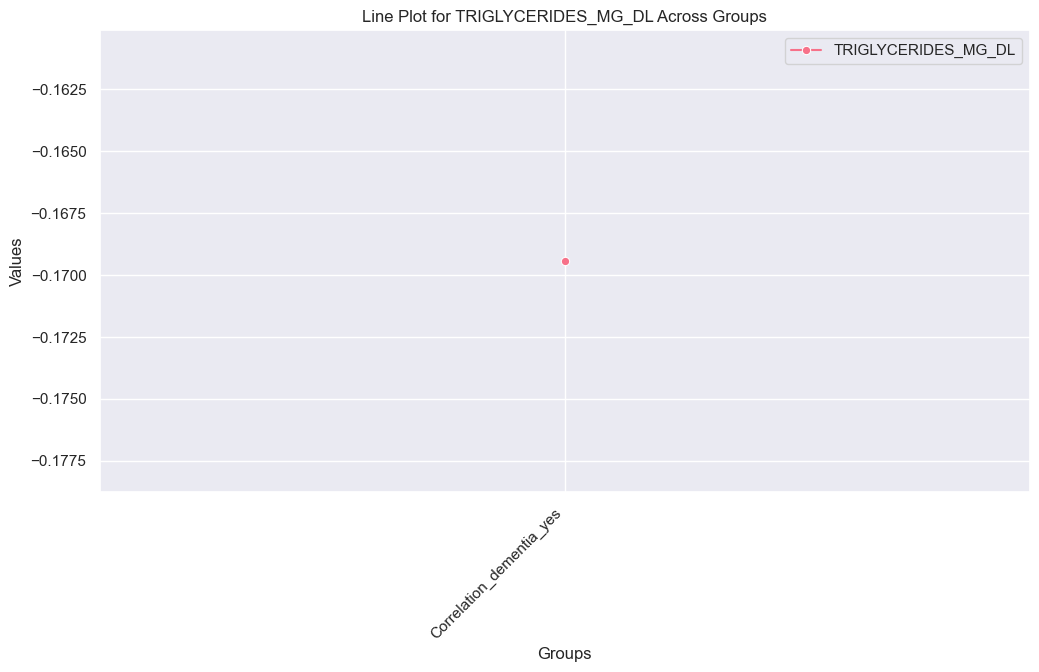

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


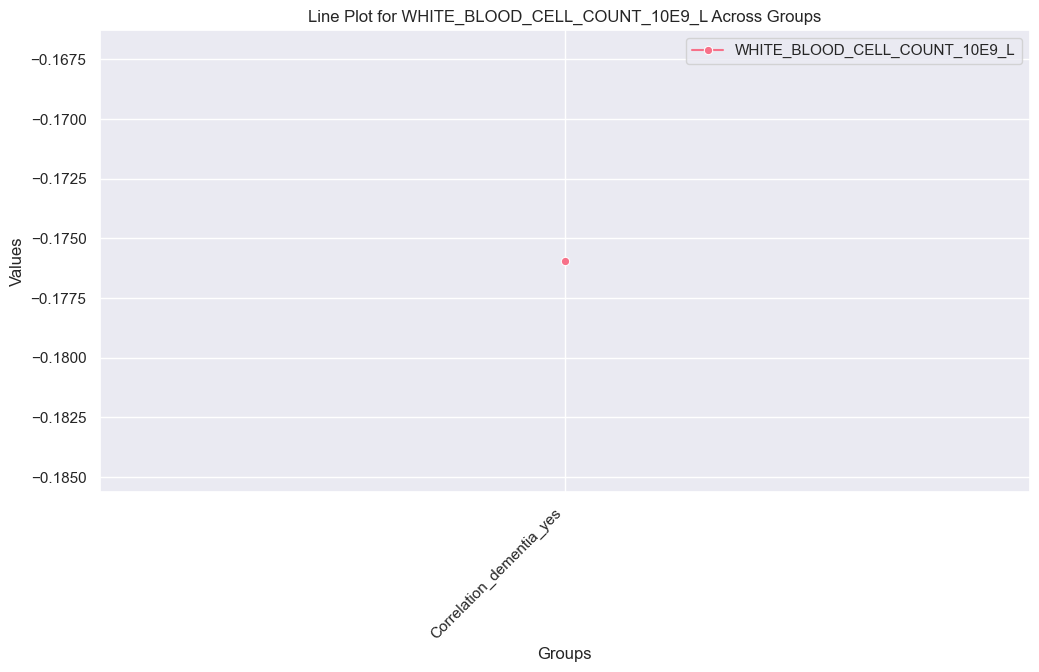

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


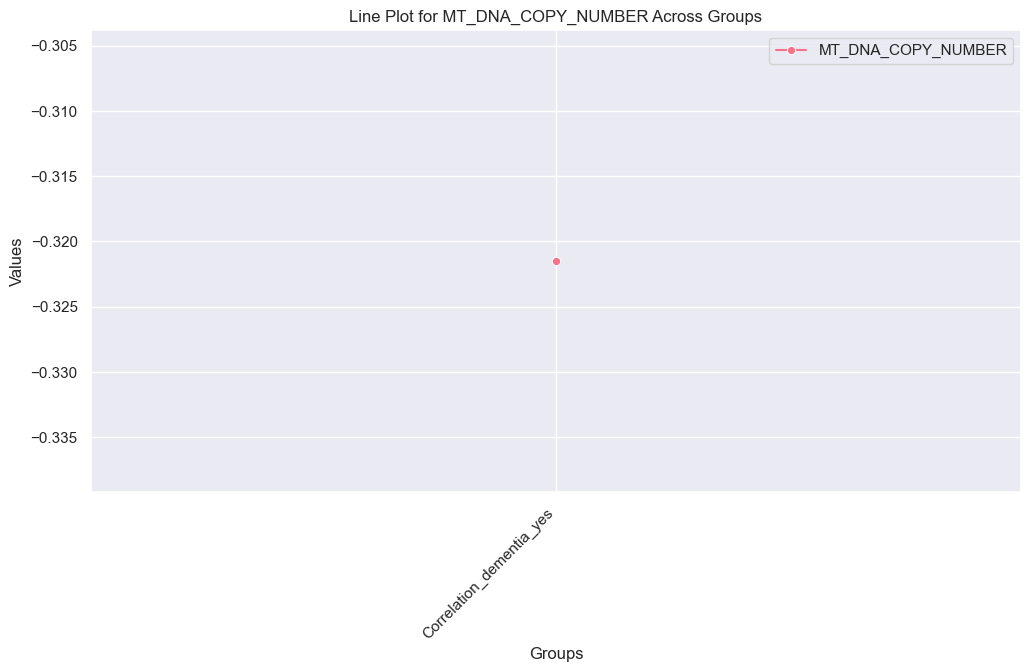

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


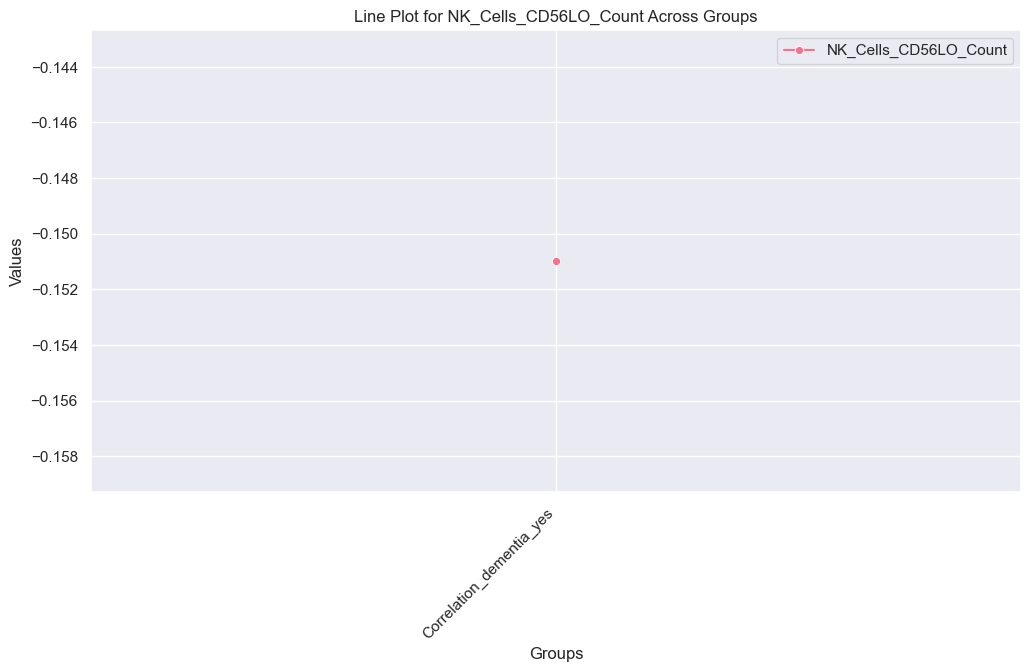

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


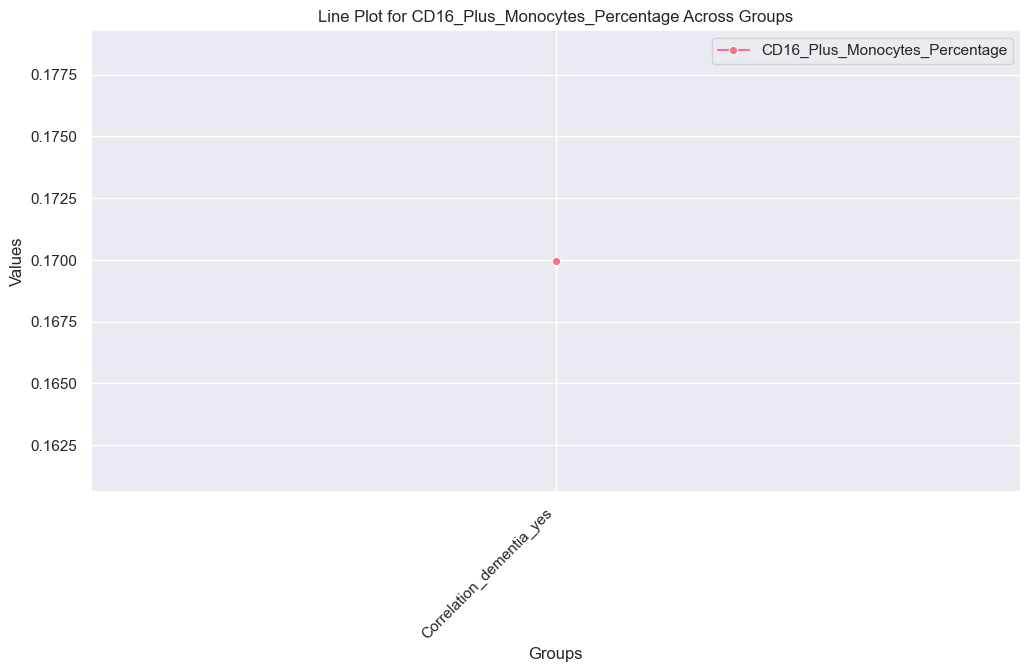

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


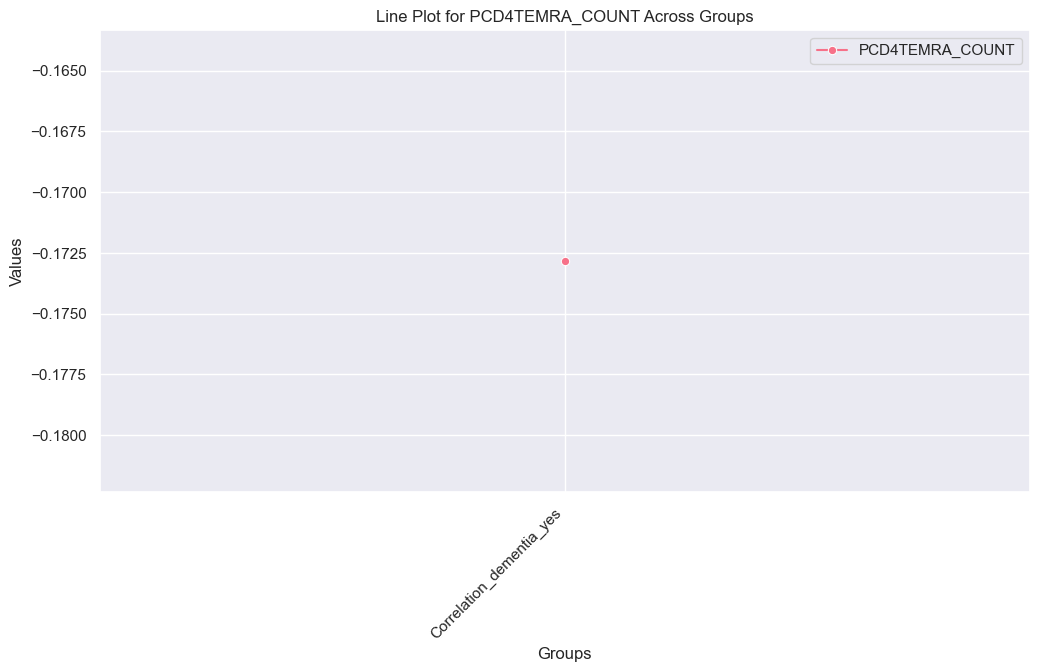

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


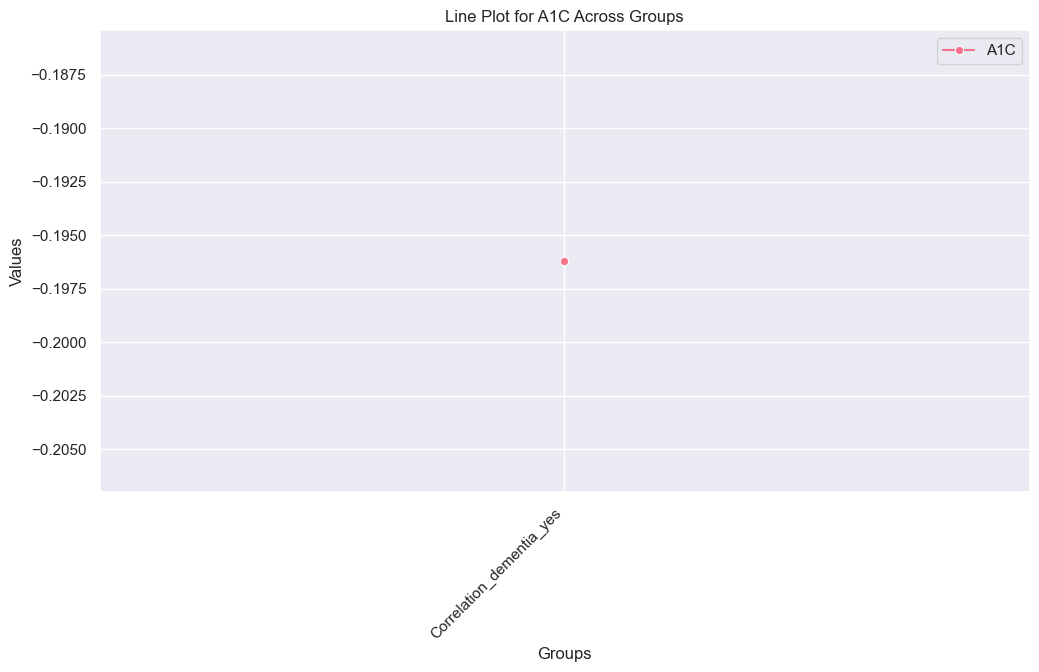

/Users/spico/Desktop/Bootcamp/Apuntes/EDA/functions_EDA_SP.py:386: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


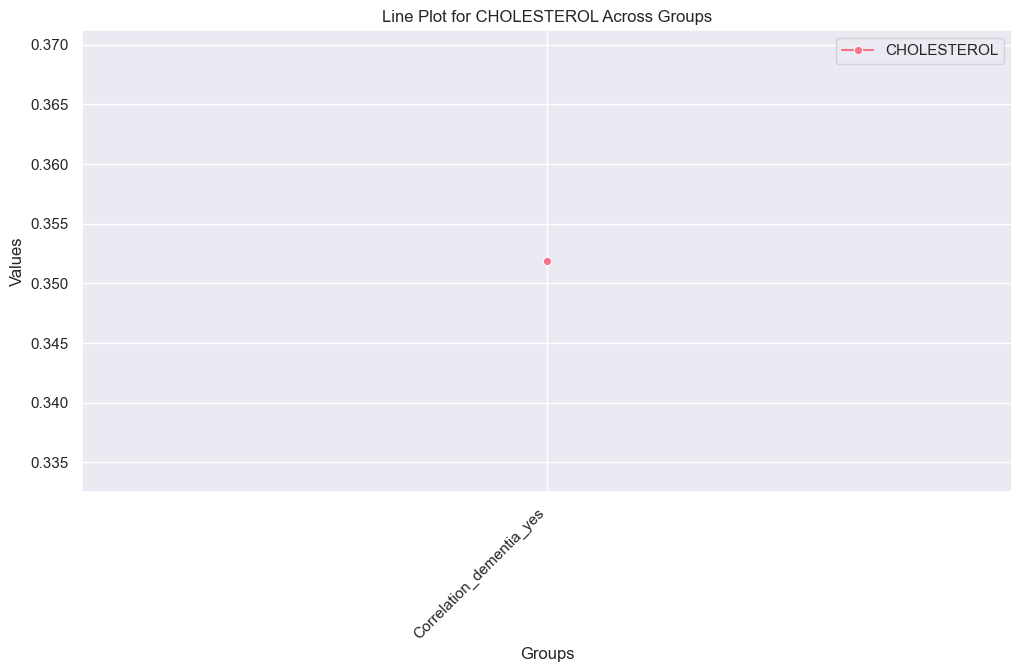

In [32]:
plot_all_variables_across_groups(merged_dataframe)

In [33]:
results = merged_dataframe.apply(find_max_min, axis=1)

In [34]:
results

Column2  Max_Correlation  \
0                                              HHIDPN        -0.566260   
1                                                HHID        -0.566260   
2                        ALANINE_AMINOTRANSFERASE_U_L        -0.172805   
3                             UREA_NITROGEN_BUN_MG_DL         0.270358   
4                                     CYSTATIN_C_MG_L         0.283659   
5         DEHYDROEPIANDROSTERONE_SULFATE_DHEAS_UMOL_L        -0.232497   
6                                 PERCENT_LYMPHOCYTES        -0.151597   
7                          MEAN_CORPUSCULAR_VOLUME_FL         0.387423   
8                        RED_BLOOD_CELL_COUNT_10E12_L        -0.170539   
9                                  PROTEIN_TOTAL_G_DL        -0.151147   
10                                           TGF_BETA        -0.153997   
11                                               IGF1        -0.150690   
12                                        PCD4M_COUNT        -0.168701   
13                                  CD4_T_Cells_Count        -0.170167   
14                            CD8_T_Cells_Naive_Count        -0.244934   
15                                      T_Cells_Count        -0.183088   
16                                 T_Cells_Percentage        -0.150054   
17                                         CYSTATIN_C         0.253730   
18                                       ALBUMIN_G_DL        -0.153250   
19                             MONOCYTE_COUNT_X10E9_L         0.173884   
20                                  PERCENT_MONOCYTES         0.228769   
21  B_TYPE_NATRIURETIC_PEPTIDE_N_TERMINAL_PRO_NT_P...         0.185409   
22                             BICARBONATE_CO2_MMOL_L         0.190286   
23                          CD16_Plus_Monocytes_Count         0.168875   
24                                  CD8_T_Cells_Count        -0.163405   
25                                    Monocytes_Count         0.154849   
26                         CD16_Minus_Monocytes_Count         0.153671   
27                                         VITAMIN_D3         0.288444   
28                           LYMPHOCYTE_COUNT_X10E9_L        -0.161790   
29                                               BDNF        -0.174094   
30                                Naive_B_Cells_Count        -0.176857   
31                                 HEMATOCRIT_PERCENT        -0.155927   
32                                    HEMOGLOBIN_G_DL        -0.192109   
33     MEAN_CORPUSCULAR_HEMOGLOBIN_CONCENTRATION_G_DL        -0.150220   
34                                       HOMOCYSTEINE         0.210325   
35                                          CLUSTERIN        -0.150744   
36                               Monocytes_Percentage         0.156152   
37                                                HDL         0.161456   
38                                        weight_2016        -0.240217   
39                              BILIRUBIN_TOTAL_MG_DL         0.259911   
40                     MEAN_CORPUSCULAR_HEMOGLOBIN_PG         0.444057   
41                                PERCENT_NEUTROPHILS         0.191696   
42                              PLATELET_COUNT_10E9_L        -0.167369   
43                    Natural_Killer_Cells_Percentage         0.153893   
44                             BASOPHIL_COUNT_X10E9_L         0.170143   
45                                  PERCENT_BASOPHILS         0.244328   
46                                PERCENT_EOSINOPHILS         0.222372   
47                                   POTASSIUM_MMOL_L        -0.198618   
48                            MEAN_PLATELET_VOLUME_FL        -0.188213   
49                RED_CELL_DISTRIBUTION_WIDTH_PERCENT        -0.257528   
50                                TRIGLYCERIDES_MG_DL        -0.169449   
51                      WHITE_BLOOD_CELL_COUNT_10E9_L        -0.175957   
52                                 MT_DNA_COPY_NUMBER        -0.321511   
53                              NK_Cells_CD56LO_Co

In [ ]:
output_file = "./data/merged_correlations_min_max_values.xlsx"
results.to_excel(output_file, index=False)

Now that I have the results, I am going to prepare the presentation of the results.